# Background

This analysis is inspired by ["Characteristics and Price Increases Among Sole-Source, Off-Patent Drugs in the United States, 2008 to 2018" ](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7431990/?report=printable)

Alpern et al noted that of 300 sole-source, off-patent, off-exclusivity (OP-OE) drug products included in their study from January 1, 2008*, to December 31, 2018:
- The overall inflation-adjusted mean increase in drug prices was 8.8% per year. 
- Ninety-five drugs (31.7%) increased by 25% or more during any calendar year, and 66 drugs (22.0%) increased by 50% or more during any calendar year. 
- Price increases of at least 25% were more likely to occur among dermatologic drugs, a class known for price increases affecting off-patent drugs.
- Drugs in the antineoplastic and immunomodulatory class were more likely to sustain price hikes of at least 25% and 50%. This finding is noteworthy considering that all of the price increases among cancer drugs affected old drugs that have been on the market for at least the last 3 decades.

*Note: The original study only used the 2019 OPOE list as the basis for product selection; no comparison was done between OPOE years

// consider focusing on a specific pharmacological class
// drug through time - how was price moved based on historical data 
// is it a bad thing for a product to be on a list? discontinued products based on prescribing etc
// are any products related to previous epidemics?
// begin with product and follow the product through time... check historical data...consider products on this list with different 

# Research Questions

- Who are the producers of the products on the FDA's OP-OE list (v. 06-21)?
- When were drugs on the OP-OE list (v. 06-21) first approved?
- Based on the first OP-OE list in 2017, how many new manufacturers have entered the market in the US?

<i> 
 - Are any of these single source products available in other markets (e.g. Asia, Europe)? [need to hunt for datasets - European Medicines Agency? India's National Medicines Registry?]  
- What are the current prices for these products? [need to hunt for datasets - GoodRx?] </i>

PITCH - how many people are consuming these drugs? Where is the system broken? Why is the system 'faulty'?

# Datasets

### [List of Off-Patent, Off-Exclusivity Drugs without an Approved Generic](https://www.fda.gov/drugs/abbreviated-new-drug-application-anda/list-patent-exclusivity-drugs-without-approved-generic)

The FDA maintains a list of approved new drug application (NDA) drug products that are no longer protected by patents or exclusivities, and for which the FDA has not approved an abbreviated new drug application (ANDA) referencing that NDA product. The FDA updates this list every six months (in June and December) to improve transparency and encourage the development and submission of ANDAs in markets with little competition.

The list is separated into three sections:

- Part I identifies those drug products for which FDA could immediately accept an ANDA without prior discussion.
- Part II identifies drug products for which ANDA development or approval may raise potential legal, regulatory, or scientific issues that should be addressed with the Agency prior to considering submission of an ANDA.
- The Appendix identifies NDA drug products that were removed from Part I or Part II of the list because one or more ANDAs referencing such NDA drug products have been approved since the previous list publication.

### openFDA API - Drugs@FDA
Documentation here: https://open.fda.gov/apis/drug/

# Methodology - pseudocode

## Dataset Prep

### OP-OE (Pseudocode)
- Download 2017-2021 datasets
- Create a merged dataframe with all products an additional column to denote date of original list
- Check dataset for nulls, duplicates, strange values
- In a new data frame, extract all NDAs, drop duplicate values, and send to list
    - nda_list will be used to generate urls a la LastFM

### OP-OE (Cleaning Code)

In [1]:
# Import libraries
from IPython import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import datetime
from dotenv import load_dotenv
import os
pd.set_option('display.max_rows', 5000)
import re
import time

#### Read in FDA's OP-OE Lists...the SHORT WAY!

In [2]:
#add OPOE filepaths to list
import glob
filelist = glob.glob('opoe_data/*')

In [3]:
# define functions to loop through all files and clean them
#function to replace 'N' in Approved NDA and add leading zeros when missing
def clean_nda(x):
    x = x.replace("N","").zfill(6).strip()
    return str(x)

#function that extracts date from filepath
def clean_date(filepath):
    year = re.match(r'.*?(20\d\d)([-_]{0,1})([01]{0,1}[1-9])', filepath).group(1)
    month = re.match(r'.*?(20\d\d)([-_]{0,1})([01]{0,1}[1-9])', filepath).group(3)
    date = f'{year}-{month}'
    return date

#function that reads excel OPOE, adds column to indicate which 'Part' the products are from, adds a column to indicate publication date based on filepath, explodes approved NDAs such that we see one NDA per row, and cleans the NDA
def read_clean(filepath):
    df0 = pd.read_excel(filepath, sheet_name = 0)
    df1 = pd.read_excel(filepath, sheet_name = 1)
    df0['Part'] = 'Part I'
    df1['Part'] = 'Part II'
    df0['Approved NDA'] = df0['Approved NDA'].apply(lambda x: str(x).split(';'))
    df1['Approved NDA'] = df1['Approved NDA'].apply(lambda x: str(x).split(';'))
    df = pd.concat([df0, df1])
    df = df.explode('Approved NDA')
    df['Approved NDA'] = df['Approved NDA'].apply(lambda x: clean_nda(x))
    df['pub_date'] = pd.to_datetime(clean_date(filepath), format = '%Y-%m').strftime('%Y-%m')
    return df


In [4]:
#function test
read_clean('opoe_data/final-201912-opoe-list-excel-posting.xlsx')

Ingredient Approved NDA  \
0                               ACETYLCHOLINE CHLORIDE       020213   
1           ACRIVASTINE; PSEUDOEPHEDRINE HYDROCHLORIDE       019806   
2                  ALENDRONATE SODIUM; CHOLECALCIFEROL       021762   
3    ALPHA-TOCOPHEROL ACETATE; ASCORBIC ACID; BIOTI...       021163   
4                                          ALPROSTADIL       020700   
5                                          AMINO ACIDS       016822   
6                                          AMINO ACIDS       017766   
7                                          AMINO ACIDS       018931   
8                                          AMINO ACIDS       019398   
9                                          AMINO ACIDS       020849   
10                                         AMINO ACIDS       019018   
11                                         AMINO ACIDS       019492   
12                                         AMINO ACIDS       020015   
13                                         AMINO ACIDS       020041   
14   AMINO ACIDS; CALCIUM ACETATE; GLYCERIN; MAGNES...       018582   
15   AMINO ACIDS; CALCIUM CHLORIDE; DEXTROSE; MAGNE...       020678   
16                               AMINO ACIDS; DEXTROSE       020734   
17   AMINO ACIDS; MAGNESIUM ACETATE; PHOSPHORIC ACI...       016822   
18   AMINO ACIDS; MAGNESIUM ACETATE; PHOSPHORIC ACI...       016822   
19             AMOXICILLIN; CLARITHROMYCIN; OMEPRAZOLE       050824   
20                                      AMPHOTERICIN B       050740   
21                           APOMORPHINE HYDROCHLORIDE       021264   
22                         APRACLONIDINE HYDROCHLORIDE       019779   
23                                          ARGATROBAN       203049   
24                                          ARGATROBAN       206769   
25                                          ARGATROBAN       209552   
26                              ARGININE HYDROCHLORIDE       016931   
27                            ARTEMETHER; LUMEFANTRINE       022268   
28     ARTICAINE HYDROCHLORIDE; EPINEPHRINE BITARTRATE       022466   
29   ASCORBIC ACID; BIOTIN; CHOLECALCIFEROL; CYANOC...       021265   
30   ASCORBIC ACID; BIOTIN; CHOLECALCIFEROL; CYANOC...       021265   
31   ASCORBIC ACID; BIOTIN; CYANOCOBALAMIN; DEXPANT...       018920   
32   ASCORBIC ACID; BIOTIN; CYANOCOBALAMIN; DEXPANT...       021625   
33   ASCORBIC ACID; BIOTIN; CYANOCOBALAMIN; DEXPANT...       021643   
34                                             ASPIRIN       200671   
35                                    ATROPINE SULFATE       021146   
36                                    ATROPINE SULFATE       206289   
37                                    ATROPINE SULFATE       208151   
38                                    ATROPINE SULFATE       209260   
39           ATROPINE SULFATE; DIFENOXIN HYDROCHLORIDE       017744   
40                                           AURANOFIN       018689   
41                                        AZELAIC ACID       020428   
42                                        AZITHROMYCIN       050693   
43                                        AZITHROMYCIN       050810   
44                                      BARIUM SULFATE       208036   
45                                      BARIUM SULFATE       208143   
46                                      BARIUM SULFATE       208844   
47        BENOXINATE HYDROCHLORIDE; FLUORESCEIN SODIUM       208582   
48                        BENZYLPENICILLOYL POLYLYSINE       050114   
49                                             BETAINE       020576   
50                             BETAXOLOL HYDROCHLORIDE       019845   
51                                          BEXAROTENE       021056   
52   BISMUTH SUBCITRATE POTASSIUM; METRONIDAZOLE; T...       050786   
53                                         BIVALIRUDIN       208374   
54                                        BRINZOLAMIDE       020816   
55                                          BUDESONIDE       021949 

In [5]:
filelist

['opoe_data/final-201912-opoe-list-excel-posting.xlsx',
 'opoe_data/2017-12 List of Off Patent Off Exclusivity Drugs w no Approved Generic.xlsx',
 'opoe_data/2018-06 List of Off Patent Off Exclusivity Drugs w no Approved Generic.xlsx',
 'opoe_data/opoe_update_for_posting_2021_6.xlsx',
 'opoe_data/2019_06_opoe_list_for_posting.xlsx',
 'opoe_data/opoe_update_2020_06_12_for_posting.xlsx',
 'opoe_data/2018-12 List of Off Patent Off Exclusivity Drugs w no Approved Generic.xlsx',
 'opoe_data/opoe_update_for_posting_2020_12.xlsx',
 'opoe_data/2017-06 List of Off Patent Off Exclusivity Drugs w no Approved Generic.xlsx']

In [6]:
results = []

for filepath in filelist:
    result = read_clean(filepath)
    results.append(result)
    
df = pd.concat(results).reset_index(drop=True)

In [7]:
df

Ingredient Approved NDA  \
0                                ACETYLCHOLINE CHLORIDE       020213   
1            ACRIVASTINE; PSEUDOEPHEDRINE HYDROCHLORIDE       019806   
2                   ALENDRONATE SODIUM; CHOLECALCIFEROL       021762   
3     ALPHA-TOCOPHEROL ACETATE; ASCORBIC ACID; BIOTI...       021163   
4                                           ALPROSTADIL       020700   
5                                           AMINO ACIDS       016822   
6                                           AMINO ACIDS       017766   
7                                           AMINO ACIDS       018931   
8                                           AMINO ACIDS       019398   
9                                           AMINO ACIDS       020849   
10                                          AMINO ACIDS       019018   
11                                          AMINO ACIDS       019492   
12                                          AMINO ACIDS       020015   
13                                          AMINO ACIDS       020041   
14    AMINO ACIDS; CALCIUM ACETATE; GLYCERIN; MAGNES...       018582   
15    AMINO ACIDS; CALCIUM CHLORIDE; DEXTROSE; MAGNE...       020678   
16                                AMINO ACIDS; DEXTROSE       020734   
17    AMINO ACIDS; MAGNESIUM ACETATE; PHOSPHORIC ACI...       016822   
18    AMINO ACIDS; MAGNESIUM ACETATE; PHOSPHORIC ACI...       016822   
19              AMOXICILLIN; CLARITHROMYCIN; OMEPRAZOLE       050824   
20                                       AMPHOTERICIN B       050740   
21                            APOMORPHINE HYDROCHLORIDE       021264   
22                          APRACLONIDINE HYDROCHLORIDE       019779   
23                                           ARGATROBAN       203049   
24                                           ARGATROBAN       206769   
25                                           ARGATROBAN       209552   
26                               ARGININE HYDROCHLORIDE       016931   
27                             ARTEMETHER; LUMEFANTRINE       022268   
28      ARTICAINE HYDROCHLORIDE; EPINEPHRINE BITARTRATE       022466   
29    ASCORBIC ACID; BIOTIN; CHOLECALCIFEROL; CYANOC...       021265   
30    ASCORBIC ACID; BIOTIN; CHOLECALCIFEROL; CYANOC...       021265   
31    ASCORBIC ACID; BIOTIN; CYANOCOBALAMIN; DEXPANT...       018920   
32    ASCORBIC ACID; BIOTIN; CYANOCOBALAMIN; DEXPANT...       021625   
33    ASCORBIC ACID; BIOTIN; CYANOCOBALAMIN; DEXPANT...       021643   
34                                              ASPIRIN       200671   
35                                     ATROPINE SULFATE       021146   
36                                     ATROPINE SULFATE       206289   
37                                     ATROPINE SULFATE       208151   
38                                     ATROPINE SULFATE       209260   
39            ATROPINE SULFATE; DIFENOXIN HYDROCHLORIDE       017744   
40                                            AURANOFIN       018689   
41                                         AZELAIC ACID       020428   
42                                         AZITHROMYCIN       050693   
43                                         AZITHROMYCIN       050810   
44                                       BARIUM SULFATE       208036   
45                                       BARIUM SULFATE       208143   
46                                       BARIUM SULFATE       208844   
47         BENOXINATE HYDROCHLORIDE; FLUORESCEIN SODIUM       208582   
48                         BENZYLPENICILLOYL POLYLYSINE       050114   
49                                              BETAINE       020576   
50                              BETAXOLOL HYDROCHLORIDE       019845   
51                                           BEXAROTENE       021056   
52    BISMUTH SUBCITRATE POTASSIUM; METRONIDAZOLE; T...       050786   
53                                          BIVALIRUDIN       208374   
54                                         BRINZOLAMIDE       020816   
55           

In [8]:
# df.groupby(by = 'pub_date').count()
# df['Approved NDA'].value_counts()

In [9]:
opoe_list = (df['Approved NDA'].unique().tolist())

## **Ask TA - There must be a better way to have done this right?**

Here's what I wish I could have done last night:

Hey Python, try to check for errors and the keys of all NDAs in the OPOE list by checking the response ((f'https://api.fda.gov/drug/drugsfda.json?search=NDA{NDA}'). 
- IF the request goes through with the NDA url, take that NDA number and:
    - ADD it to a new nda_opoe_list
- If you get a key error, check to see if the NDA is actually a BLA by checking the response (f'https://api.fda.gov/drug/drugsfda.json?search=BLA{NDA}')
    - IF the request goes through with the BLA url, take that NDA number and:
        - ADD it to a new BLA list
    - ELSE take that NDA number and 
        - ADD it to a new other list

```

keycheck = []
nda_opoe_list = []
bla_opoe_list = []
n_opoe_list = []
count = 0
    try:
        for NDA in opoe_list:
            NDA = NDA
            print(f'https://api.fda.gov/drug/drugsfda.json?search=NDA{NDA}')
            count = count+1
            print(count)
            response = requests.get(f'https://api.fda.gov/drug/drugsfda.json?search=NDA{NDA}')
            data = response.json()
            keycheck.append(NDA)
            for d in data['results']:
                try:
                    keys = str(d.keys())
                    keycheck.append(keys)
                    nda_opoe_list.append(NDA)

                except KeyError:
                        try:
                            for NDA in opoe_list:
                                NDA = NDA
                                print(f'https://api.fda.gov/drug/drugsfda.json?search=BLA{NDA}')
                                count = count+1
                                print(count)
                                response = requests.get(f'https://api.fda.gov/drug/drugsfda.json?search=BLA{NDA}')
                                data = response.json()
                                keycheck.append(NDA)
                                for d in data['results']:
                                    try:
                                        keys = str(d.keys())
                                        keycheck.append(keys)
                                        bla_opoe_list.append(NDA)
                        except KeyError:
                            for NDA in opoe_list:
                                n_opoe_list.append(NDA)
                            pass
      


keycheck = pd.DataFrame(keycheck)
nda_opoe_list
bla_opoe_list
n_opoe_list

```

In [10]:

# keycheck = []
# nda_opoe_list = []
# bla_opoe_list = []
# n_opoe_list = []
# count = 0
# try:
#     for NDA in opoe_list:
#         NDA = NDA
#         print(f'https://api.fda.gov/drug/drugsfda.json?search=NDA{NDA}')
#         count = count+1
#         print(count)
#         response = requests.get(f'https://api.fda.gov/drug/drugsfda.json?search=NDA{NDA}')
#         data = response.json()
#         keycheck.append(NDA)
#         for d in data['results']:
#             try:
#                 keys = str(d.keys())
#                 keycheck.append(keys)
#                 nda_opoe_list.append(NDA)

#             except KeyError:
#                     try:
#                         for NDA in opoe_list:
#                             NDA = NDA
#                             print(f'https://api.fda.gov/drug/drugsfda.json?search=BLA{NDA}')
#                             count = count+1
#                             print(count)
#                             response = requests.get(f'https://api.fda.gov/drug/drugsfda.json?search=BLA{NDA}')
#                             data = response.json()
#                             keycheck.append(NDA)
#                             for d in data['results']:
#                                 try:
#                                     keys = str(d.keys())
#                                     keycheck.append(keys)
#                                     bla_opoe_list.append(NDA)
#                                 except KeyError:
#                                     for NDA in opoe_list:
#                                         n_opoe_list.append(NDA)
#                                     pass


# keycheck                                
# nda_opoe_list
# bla_opoe_list
# n_opoe_list

In [11]:
# the NDAs on this list were converted to BLAs in March 2020

op_df = df.loc[(df['Approved NDA'] != '017836') & (df['Approved NDA'] != '017837') \
               & (df['Approved NDA'] != '020032') & (df['Approved NDA'] != '020521') \
               & (df['Approved NDA'] != '020162') & (df['Approved NDA'] != '020378') \
               & (df['Approved NDA'] != '021211') & (df['Approved NDA'] != '021765') \
               & (df['Approved NDA'] != '017016') & (df['Approved NDA'] != '021640') \
               & (df['Approved NDA'] != '021665') & (df['Approved NDA'] != '020367') \
               & (df['Approved NDA'] != "208751") & (df['Approved NDA'] != "021172") \
               & (df['Approved NDA'] != '020986') & (df['Approved NDA'] != "021536") \
               & (df['Approved NDA'] != "205692") & (df['Approved NDA'] != "018780") \
               & (df['Approved NDA'] != "209196") & (df['Approved NDA'] != "021017") \
               & (df['Approved NDA'] != "021018") & (df['Approved NDA'] !=  "020563") \
               & (df['Approved NDA'] != "021839") & (df['Approved NDA'] != "021663") \
               & (df['Approved NDA'] != "022175") \
               & (df['Approved NDA'] != "022523") & (df['Approved NDA'] != "022542") \
               & (df['Approved NDA'] != "019818") & (df['Approved NDA'] != "021106") \
               & (df['Approved NDA'] != "020744") & (df['Approved NDA'] != "019764") \
               & (df['Approved NDA'] != "019774") & (df['Approved NDA'] != "020280") \
               & (df['Approved NDA'] != "020522") & (df['Approved NDA'] != "020604") \
               & (df['Approved NDA'] != '019640') & (df['Approved NDA'] != "021426") \
               & (df['Approved NDA'] != "021597") & (df['Approved NDA'] != "017881") \
               & (df['Approved NDA'] != "020898") & (df['Approved NDA'] != "022575") \
               & (df['Approved NDA'] != "021559") & (df['Approved NDA'] != "021646") \
               & (df['Approved NDA'] != "021271") & (df['Approved NDA'] != "022222") \
               & (df['Approved NDA'] != "021905") & (df['Approved NDA'] != "017776") \
               & (df['Approved NDA'] != "021289") & (df['Approved NDA'] != "017067") \
               & (df['Approved NDA'] != "017692") & (df['Approved NDA'] != "021958")]
#send all NDAs to list
nda_opoe_list = (op_df['Approved NDA'].unique().tolist())
len(nda_opoe_list)

730

In [12]:
df_bla = df.loc[(df['Approved NDA'] == '017836') | (df['Approved NDA'] == '017837') \
               | (df['Approved NDA'] == '020032') | (df['Approved NDA'] == '020521') \
               | (df['Approved NDA'] == '020162') | (df['Approved NDA'] == '020378') \
               | (df['Approved NDA'] == '021211') | (df['Approved NDA'] == '021765') \
               | (df['Approved NDA'] == '017016') | (df['Approved NDA'] == '021640') \
               | (df['Approved NDA'] == '021665') | (df['Approved NDA'] == '020367') \
               | (df['Approved NDA'] == "208751") | (df['Approved NDA'] == "021172") \
               | (df['Approved NDA'] == '020986') | (df['Approved NDA'] == "021536") \
               | (df['Approved NDA'] == "205692") | (df['Approved NDA'] == "018780") \
               | (df['Approved NDA'] == "209196") | (df['Approved NDA'] == "021017") \
               | (df['Approved NDA'] == "021018") | (df['Approved NDA'] ==  "020563") \
               | (df['Approved NDA'] == "021839") | (df['Approved NDA'] == "021663") \
               | (df['Approved NDA'] == "022175") \
               | (df['Approved NDA'] == "022523") | (df['Approved NDA'] == "022542") \
               | (df['Approved NDA'] == "019818") | (df['Approved NDA'] == "021106") \
               | (df['Approved NDA'] == "020744") | (df['Approved NDA'] == "019764") \
               | (df['Approved NDA'] == "019774") | (df['Approved NDA'] == "020280") \
               | (df['Approved NDA'] == "020522") | (df['Approved NDA'] == "020604") \
               | (df['Approved NDA'] == '019640') | (df['Approved NDA'] == "021426") \
               | (df['Approved NDA'] == "021597") | (df['Approved NDA'] == "017881") \
               | (df['Approved NDA'] == "020898") | (df['Approved NDA'] == "022575") | (df['Approved NDA'] == "021271")\
               | (df['Approved NDA'] == "017776") \
               | (df['Approved NDA'] == "021289") | (df['Approved NDA'] == "017067") \
               | (df['Approved NDA'] == "017692")]

bla_opoe_list = df_bla['Approved NDA'].unique().tolist()
len(df_bla)
len(bla_opoe_list)

46

In [13]:
other_df = df.loc[(df['Approved NDA'] == "021559") \
                  | (df['Approved NDA'] == "021646")  \
                  | (df['Approved NDA'] == "022222") \
                  | (df['Approved NDA'] == "021905")  \
                  | (df['Approved NDA'] == "021958")]
n_opoe_list = other_df['Approved NDA'].unique().tolist()

In [14]:
# keycheck = []
# count = 0
# # try:
# for NDA in opoe_list:
#     NDA = NDA
#     print(f'https://api.fda.gov/drug/drugsfda.json?search=NDA{NDA}')
#     count = count+1
#     print(count)
#     response = requests.get(f'https://api.fda.gov/drug/drugsfda.json?search=NDA{NDA}')
#     data = response.json()
#     keycheck.append(NDA)
#     for d in data['results']:
#         try:
#             keys = str(d.keys())
#             keycheck.append(keys)

#         except KeyError:
#             sys.exc_clear()

# # except KeyError:
# #     print(NDA)
# #     sys.exc_clear()


# keycheck
# nda_check = pd.DataFrame(keycheck)
# nda_check

In [15]:
# pd.set_option("max_colwidth", 300)

# keycheck = []
# count = 0
# # try:
# for BLA in bla_opoe_list:
#     BLA = BLA
#     print(f'https://api.fda.gov/drug/drugsfda.json?search=BLA{BLA}')
#     count = count+1
#     print(count)
#     response = requests.get(f'https://api.fda.gov/drug/drugsfda.json?search=BLA{BLA}')
#     data = response.json()
#     keycheck.append(BLA)
#     for d in data['results']:
#         try:
#             keys = str(d.keys())
#             keycheck.append(keys)

#         except KeyError:
#             sys.exc_clear()

# # except KeyError:
# #     print(NDA)
# #     sys.exc_clear()


# keycheck
# bla_check = pd.DataFrame(keycheck)
# bla_check

In [16]:
# pd.set_option("max_colwidth", 300)

# keycheck = []
# count = 0
# # try:
# for N in n_opoe_list:
#     N = N
#     print(f'https://api.fda.gov/drug/drugsfda.json?search=N{N}')
#     count = count+1
#     print(count)
#     response = requests.get(f'https://api.fda.gov/drug/drugsfda.json?search=N{N}')
#     data = response.json()
#     keycheck.append(N)
#     for d in data['results']:
#         try:
#             keys = str(d.keys())
#             keycheck.append(keys)

#         except KeyError:
#             sys.exc_clear()

# # except KeyError:
# #     print(NDA)
# #     sys.exc_clear()


# keycheck
# n_check = pd.DataFrame(keycheck)
# n_check

#### Read in FDA's OP-OE Lists...the LONG WAY! (NO FUNCTIONS)

In [ ]:
#June 2017 List Part I
opoe0617 = pd.read_excel('opoe_data/2017-06 List of Off Patent Off Exclusivity Drugs w no Approved Generic.xlsx')

In [ ]:
#opoe0617[opoe0617['Approved NDA'].str.contains(";")]

In [ ]:
# split 'Approved NDA' based on ';' such that each NDA is its own record #x.str.split for a series str(x) for cell
opoe0617 = opoe0617.set_index(['Ingredient']).apply(lambda x: x.str.split(';').explode()).reset_index()
# add additional columns to match rest of opoe lists
opoe0617['Dosage Form'] = ''
opoe0617['Part'] = 'Part I'
opoe0617['pub_date'] = '2017-06'

In [ ]:
opoe0617

In [ ]:
#June 2017 List Part II
opoe0617p2 = pd.read_excel('opoe_data/2017-06 List of Off Patent Off Exclusivity Drugs w no Approved Generic.xlsx', sheet_name = 1)
# split 'Approved NDA' based on ';' such that each NDA is its own record
opoe0617p2 = opoe0617p2.set_index(['Ingredient']).apply(lambda x: x.str.split(';').explode()).reset_index()
# add additional columns to match rest of opoe lists
opoe0617p2['Dosage Form'] = ''
opoe0617p2['Part'] = 'Part II'
opoe0617p2['pub_date'] = '2017-06'
opoe0617p2

In [ ]:
#Read in subsequent publications...
opoe1217 = pd.read_excel('opoe_data/2017-12 List of Off Patent Off Exclusivity Drugs w no Approved Generic.xlsx')
opoe1217['Part'] = 'Part I'
opoe1217['pub_date'] = '2017-12'

opoe1217p2 = pd.read_excel('opoe_data/2017-12 List of Off Patent Off Exclusivity Drugs w no Approved Generic.xlsx', sheet_name = 1)
opoe1217p2['Part'] = 'Part II'
opoe1217p2['pub_date'] = '2017-12'

In [ ]:
opoe0618 = pd.read_excel('opoe_data/2018-06 List of Off Patent Off Exclusivity Drugs w no Approved Generic.xlsx')
opoe0618['Part'] = 'Part I'
opoe0618['pub_date'] = '2018-06'

opoe0618p2 = pd.read_excel('opoe_data/2018-06 List of Off Patent Off Exclusivity Drugs w no Approved Generic.xlsx', sheet_name = 1)
opoe0618p2['Part'] = 'Part II'
opoe0618p2['pub_date'] = '2018-06'

In [ ]:
opoe1218 = pd.read_excel('opoe_data/2018-12 List of Off Patent Off Exclusivity Drugs w no Approved Generic.xlsx')
opoe1218['Approved NDA'] = opoe1218['Approved NDA'].astype('str')
opoe1218['Part'] = 'Part I'
opoe1218['pub_date'] = '2018-12'
#NEED TO ADD PADDING TO NDAs
opoe1218['Approved NDA'] = opoe1218['Approved NDA'].str.zfill(6)

opoe1218p2 = pd.read_excel('opoe_data/2018-12 List of Off Patent Off Exclusivity Drugs w no Approved Generic.xlsx', sheet_name = 1)
opoe1218p2['Approved NDA'] = opoe1218p2['Approved NDA'].astype('str')
opoe1218p2['Part'] = 'Part II'
opoe1218p2['pub_date'] = '2018-12'
#NEED TO ADD PADDING TO NDAs
opoe1218p2['Approved NDA'] = opoe1218p2['Approved NDA'].str.zfill(6)

In [ ]:
opoe0619 = pd.read_excel('opoe_data/2019_06_opoe_list_for_posting.xlsx')
opoe0619['Approved NDA'] = opoe0619['Approved NDA'].astype('str')
opoe0619['Part'] = 'Part I'
opoe0619['pub_date'] = '2019-06'
#NEED TO ADD PADDING TO NDAs
opoe0619['Approved NDA'] = opoe0619['Approved NDA'].str.zfill(6)

opoe0619p2 = pd.read_excel('opoe_data/2019_06_opoe_list_for_posting.xlsx', sheet_name = 1)
opoe0619p2['Approved NDA'] = opoe0619p2['Approved NDA'].astype('str')
opoe0619p2['Part'] = 'Part II'
opoe0619p2['pub_date'] = '2019-06'
#NEED TO ADD PADDING TO NDAs
opoe0619p2['Approved NDA'] = opoe0619p2['Approved NDA'].str.zfill(6)

In [ ]:
opoe1219 = pd.read_excel('opoe_data/final-201912-opoe-list-excel-posting.xlsx')
opoe1219['Approved NDA'] = opoe1219['Approved NDA'].astype('str')
opoe1219['Part'] = 'Part I'
opoe1219['pub_date'] = '2019-12'
#NEED TO ADD PADDING TO NDAs
opoe1219['Approved NDA'] = opoe1219['Approved NDA'].str.zfill(6)

opoe1219p2 = pd.read_excel('opoe_data/final-201912-opoe-list-excel-posting.xlsx', sheet_name = 1)
opoe1219p2['Approved NDA'] = opoe1219p2['Approved NDA'].astype('str')
opoe1219p2['Part'] = 'Part II'
opoe1219p2['pub_date'] = '2019-12'
#NEED TO ADD PADDING TO NDAs
opoe1219p2['Approved NDA'] = opoe1219p2['Approved NDA'].str.zfill(6)

In [ ]:
opoe0620 = pd.read_excel('opoe_data/opoe_update_2020_06_12_for_posting.xlsx')
opoe0620['Part'] = 'Part I'
opoe0620['pub_date'] = '2020-06'

opoe0620p2 = pd.read_excel('opoe_data/opoe_update_2020_06_12_for_posting.xlsx', sheet_name = 1)
opoe0620p2['Part'] = 'Part II'
opoe0620p2['pub_date'] = '2020-06'

In [ ]:
opoe1220 = pd.read_excel('opoe_data/opoe_update_for_posting_2020_12.xlsx')
opoe1220['Part'] = 'Part I'
opoe1220['pub_date'] = '2020-12'

opoe1220p2 = pd.read_excel('opoe_data/opoe_update_for_posting_2020_12.xlsx', sheet_name = 1)
opoe1220p2['Part'] = 'Part II'
opoe1220p2['pub_date'] = '2020-12'

In [ ]:
#Latest Version: June 2021
opoe0621 = pd.read_excel('opoe_data/opoe_update_for_posting_2021_6.xlsx')
opoe0621['Part'] = 'Part I'
opoe0621['pub_date'] = '2021-06'

opoe0621p2 = pd.read_excel('opoe_data/opoe_update_for_posting_2021_6.xlsx', sheet_name = 1)
opoe0621p2['Part'] = 'Part II'
opoe0621p2['pub_date'] = '2021-06'

In [ ]:
opoe0621.info()
# No null values!

In [ ]:
opoe0621.describe()

In [ ]:
opoe0621.head(3)

In [ ]:
opoe0621[opoe0621.duplicated(subset=['Ingredient'])]
# 66 duplicate ingredients

In [ ]:
pd.set_option('display.max_colwidth',500)

In [ ]:
opoe0621[opoe0621.duplicated(subset=['Approved NDA'])]
# 3 duplicate NDAs...which is strange. Should be an even number

In searching the FDA website:
- 021265 is related to two types of product packaging for individual use and in bulk
- 016822 appears twice in the list because of multiple packages and strengths, as well as salts in the ingredient list 
    - FREAMINE III 3% W/ ELECTROLYTES = amino acid ending with sodium chloride
    - FREAMINE III 8.5%	AMINO ACIDS	= amino acid ending with sodium acetate

In [ ]:
# Merge all OPOE Datasets together
dataframes = [opoe0617, opoe1217, opoe0618, opoe1218, opoe0619, opoe1219, opoe0620, opoe1220, opoe0621,opoe0617p2, opoe1217p2, opoe0618p2, opoe1218p2, opoe0619p2, opoe1219p2, opoe0620p2, opoe1220p2, opoe0621p2]
opoe_merge = pd.concat(dataframes).reset_index(drop = True)

In [ ]:
opoe_merge

In [ ]:
#Convert 'pub_date' to datetime format
opoe_merge['pub_date'] = pd.to_datetime(opoe_merge['pub_date'], format = '%Y-%m')

In [ ]:
#Strip "N" from NDA id
opoe_merge['Approved NDA'] = (opoe_merge['Approved NDA'].str[-6:])

In [ ]:
opoe_merge.groupby(by = 'pub_date').count()
opoe_merge['Approved NDA'].value_counts()

### Drugs@FDA (Pseudocode)
- Loop through each URL endpoint (amending each request with the NDA numbers extracted from OP-OE in 'nda_list')
- For each NDA, collect the following information in a dataframe (: example)

"submission_type": "ORIG",  
"submission_number": "1",  
"submission_status": "AP",  
"submission_status_date": "20110208",  
"application_number": ["NDA050824"],  
"brand_name": ["OMECLAMOX-PAK"],  
"generic_name": ["OMEPRAZOLE, CLARITHROMYCIN, AMOXICILLIN"],  
"manufacturer_name": ["Cumberland Pharmaceuticals Inc."]

- Remove the first three characters of the application number
- Merge Drug@FDA data frame with OP-OE data frame on application number

### Drugs@FDA API Call

Open FDA offers documentation on its Drug API's endpoints that are: 
- Adverse Events
- Product Labeling
- NDC Directory
- Recall Enforcement Reports
- Drugs@FDA <- the endpoint containing product application information

Each Drugs@FDA entry consists of four major sections:
- Application data: The top level information which contains the details of the application.
- Product data: A list of all products included in the application with details on each.
- Submissions data: A list of all submissions associated with the application with details of each.
- An <b>openfda</b> section: An annotation with additional identifiers associate with the application number, <b>if available</b>

In [ ]:
#Need more information to check on current manufacturers [NDA Holders]; let's connect to the Drugs@FDA to find more information about these products

Example query from openFDA: https://api.fda.gov/drug/drugsfda.json?search=products.marketing_status:"Discontinued"&limit=5

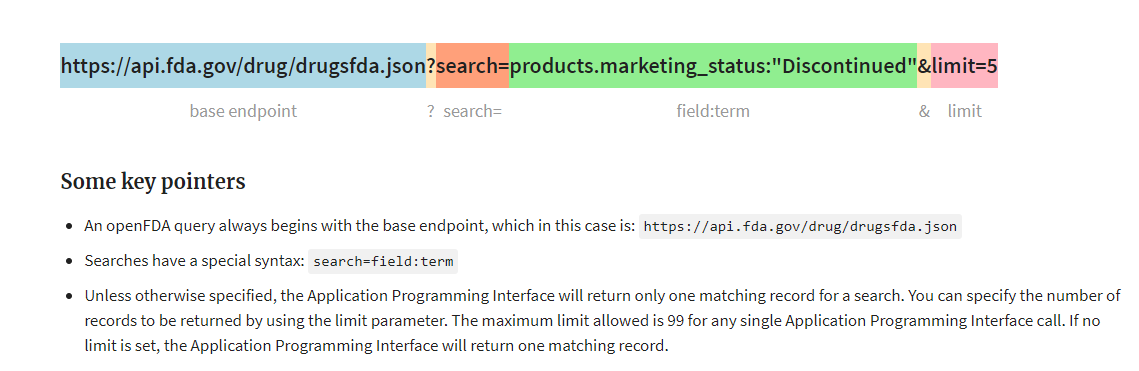

In [17]:
# create a dataframe where every row is an application number (index)
# request based on application number
# merge API dataframe with opoe data frame

In [18]:
load_dotenv()
API_KEY = os.getenv("API_KEY")
API_KEY2 = os.getenv("API_KEY2")
API_KEY3 = os.getenv("API_KEY3")

In [19]:
# test
response = requests.get(f'https://api.fda.gov/drug/drugsfda.json?search=NDA016822')
data = response.json()

In [20]:
#the response is composed of metadata and results...we care about results
data.keys()

dict_keys(['meta', 'results'])

In [21]:
#results contains a list which contains a dictionary
data['results'][0].keys()

dict_keys(['submissions', 'application_number', 'sponsor_name', 'openfda', 'products'])

In [22]:
#the submission key contains another list which contains another dictionary
data['results'][0]['submissions'][0]

{'submission_type': 'SUPPL',
 'submission_number': '11',
 'submission_status': 'AP',
 'submission_status_date': '19781002',
 'review_priority': 'PRIORITY',
 'submission_class_code': 'MANUF (CMC)',
 'submission_class_code_description': 'Manufacturing (CMC)'}

In [23]:
# for the analysis we only care about the original submission and its submission date
for submission in data['results'][0]['submissions']:
    if submission['submission_type'] == 'ORIG':
        print(submission['submission_type'])
        print(submission['submission_status_date'])

ORIG
19710924


In [24]:
# application number key could be used as an unique id
data['results'][0]['application_number']

'NDA016822'

In [25]:
#sponsor name key gives you the manufacturer name
data['results'][0]['sponsor_name']

'B BRAUN'

In [26]:
#not so useful
for submission in data['results'][0]['submissions']:
    if submission['submission_type'] == 'ORIG':
        print(submission)

{'submission_type': 'ORIG', 'submission_number': '1', 'submission_status': 'AP', 'submission_status_date': '19710924', 'review_priority': 'PRIORITY', 'submission_class_code': 'TYPE 4', 'submission_class_code_description': 'Type 4 - New Combination'}


In [27]:
#openfda key gives you manufacturer, brand, generic name, ndc, type of drug, etc...but is not available for all NDAs
data['results'][0]['openfda']

{'application_number': ['NDA016822'],
 'brand_name': ['FREAMINE III', 'FREAMINE HBC'],
 'generic_name': ['ISOLEUCINE, LEUCINE, LYSINE, METHIONINE, PHENYLALANINE, THREONINE, TRYPTOPHAN, VALINE, ALANINE, ARGININE, HISTIDINE, PROLINE, SERINE, GLYCINE, CYSTEINE, PHOSPHORIC ACID, AND SODIUM BISULFITE',
  'ISOLEUCINE, LEUCINE, LYSINE, METHIONINE, PHENYLALANINE, THREONINE, TRYPTOPHAN, VALINE, ALANINE, ARGININE, HISTIDINE, PROLINE, SERINE, GLYCINE, CYSTEINE, AND SODIUM BISULFITE'],
 'manufacturer_name': ['B. Braun Medical Inc.'],
 'product_ndc': ['0264-9010', '0264-9011', '0264-9350'],
 'product_type': ['HUMAN PRESCRIPTION DRUG'],
 'route': ['INTRAVENOUS'],
 'substance_name': ['ISOLEUCINE',
  'LEUCINE',
  'LYSINE ACETATE',
  'METHIONINE',
  'PHENYLALANINE',
  'THREONINE',
  'TRYPTOPHAN',
  'VALINE',
  'ALANINE',
  'ARGININE',
  'HISTIDINE',
  'PROLINE',
  'SERINE',
  'GLYCINE',
  'CYSTEINE HYDROCHLORIDE',
  'PHOSPHORIC ACID'],
 'rxcui': ['1014427', '1014431', '800858', '800862'],
 'spl_id': ['

In [28]:
#products key give you information about different products associated with the nda
data['results'][0]['products'][0]

{'product_number': '006',
 'reference_drug': 'No',
 'brand_name': 'FREAMINE HBC 6.9%',
 'active_ingredients': [{'name': 'AMINO ACIDS',
   'strength': '6.9% (6.9GM/100ML)'}],
 'reference_standard': 'No',
 'dosage_form': 'INJECTABLE',
 'route': 'INJECTION',
 'marketing_status': 'Prescription'}

In [29]:
#Now let's create a for loop to get all the information we need into a data frame

In [30]:
#Looping through results

#Creating an empty list named "mydata"
mydata = []

# Hey, Python, you try to do what I'm telling you, and when you fail because of a KeyError (since openfda is not always available), pass it
for d in data['results']:
    try:
        mydict = {'application_number': str(d['application_number']),
                  'sponsor_name': str(d['sponsor_name']),
                  'app_numb_openfda': str(d['openfda']['application_number']),
                  'brand_name' : str(d['openfda']['brand_name']),
                  'generic_name': str(d['openfda']['generic_name']),
                  'manufacturer_name':  str(d['openfda']['manufacturer_name']),
                  'product_ndc':  str(d['openfda']['product_ndc']),
                  'product_type':  str(d['openfda']['product_type']),
                  'rxcui':  str(d['openfda']['rxcui']),
                  'spl_id':  str(d['openfda']['spl_id']),
                  'spl_set_id':  str(d['openfda']['spl_set_id']),
                  'package_ndc':  str(d['openfda']['package_ndc']),
                  'submission_type': str([s['submission_type'] for d in data['results'] for s in d['submissions'] if s['submission_type'] == 'ORIG']),
                  'submission_status_date': str([s['submission_status_date'] for d in data['results'] for s in d['submissions'] if s['submission_type'] == 'ORIG']),
                  'product_number': str([item['product_number'] for item in d['products']]),
                  'reference_drug': str([item['reference_drug'] for item in d['products']]),
                  'active_ingredients': str([item['active_ingredients'] for item in d['products']]),
                  'marketing_status': str([item['marketing_status'] for item in d['products']]),
                  'reference_standard': str([item['reference_standard'] for item in d['products']]),
                  'dosage_form': str([item['dosage_form'] for item in d['products']])
                 }

        mydata.append(mydict)

    except KeyError:
        pass

mydata
                  
#Turning mydata list into a dataframe    
df2 = pd.DataFrame(mydata)
#Checking out this df2 shape to understand how many openfdas I have/are available
print(df2.shape)
df2

(1, 20)


application_number sponsor_name app_numb_openfda  \
0          NDA016822      B BRAUN    ['NDA016822']   

                         brand_name  \
0  ['FREAMINE III', 'FREAMINE HBC']   

                                        generic_name  \
0  ['ISOLEUCINE, LEUCINE, LYSINE, METHIONINE, PHE...   

           manufacturer_name                              product_ndc  \
0  ['B. Braun Medical Inc.']  ['0264-9010', '0264-9011', '0264-9350']   

                  product_type                                       rxcui  \
0  ['HUMAN PRESCRIPTION DRUG']  ['1014427', '1014431', '800858', '800862']   

                                              spl_id  \
0  ['91452047-2415-487d-bbb1-8324644aedc4', '29b0...   

                                          spl_set_id  \
0  ['aa89dad1-bf4f-4f7e-ad1b-2431bdf36a2d', '6ea7...   

                                        package_ndc submission_type  \
0  ['0264-9010-55', '0264-9011-55', '0264-9350-55']        ['ORIG']   

  submission_status_date                                     product_number  \
0           ['19710924']  ['006', '004', '002', '007', '005', '003', '001']   

                               reference_drug  \
0  ['No', 'No', 'No', 'No', 'No', 'No', 'No']   

                                  active_ingredients  \
0  [[{'name': 'AMINO ACIDS', 'strength': '6.9% (6...   

                                    marketing_status  \
0  ['Prescription', 'Prescription', 'Discontinued...   

                           reference_standard  \
0  ['No', 'No', 'No', 'No', 'No', 'No', 'No']   

                                         dosage_form  
0  ['INJECTABLE', 'INJECTABLE', 'INJECTABLE', 'IN...

In [31]:
opoe_list

['020213',
 '019806',
 '021762',
 '021163',
 '020700',
 '016822',
 '017766',
 '018931',
 '019398',
 '020849',
 '019018',
 '019492',
 '020015',
 '020041',
 '018582',
 '020678',
 '020734',
 '050824',
 '050740',
 '021264',
 '019779',
 '203049',
 '206769',
 '209552',
 '016931',
 '022268',
 '022466',
 '021265',
 '018920',
 '021625',
 '021643',
 '200671',
 '021146',
 '206289',
 '208151',
 '209260',
 '017744',
 '018689',
 '020428',
 '050693',
 '050810',
 '208036',
 '208143',
 '208844',
 '208582',
 '050114',
 '020576',
 '019845',
 '021056',
 '050786',
 '208374',
 '020816',
 '021949',
 '205613',
 '021306',
 '009386',
 '020524',
 '018469',
 '021703',
 '020577',
 '019367',
 '019634',
 '018895',
 '208418',
 '022562',
 '050779',
 '207131',
 '050817',
 '050823',
 '021197',
 '010669',
 '012750',
 '009435',
 '011870',
 '018961',
 '020369',
 '020805',
 '019481',
 '021314',
 '050635',
 '208083',
 '050803',
 '017765',
 '203479',
 '018960',
 '200740',
 '050748',
 '205582',
 '020705',
 '204150',
 '050616',

In [32]:
#call API

mydata = []
for NDA in nda_opoe_list[:5]:
    NDA = NDA
#     print(NDA)
    print(f'https://api.fda.gov/drug/drugsfda.json?search=NDA{NDA}')
    response = requests.get(f'https://api.fda.gov/drug/drugsfda.json?search=NDA{NDA}')
    data = response.json()

    for d in data['results']:
        try:
            mydict = {'application_number': str(d['application_number']),
                      'sponsor_name': str(d['sponsor_name']),
                      'app_numb_openfda': str(d['openfda']['application_number']),
                      'brand_name' : str(d['openfda']['brand_name']),
                      'generic_name': str(d['openfda']['generic_name']),
                      'manufacturer_name':  str(d['openfda']['manufacturer_name']),
                      'product_ndc':  str(d['openfda']['product_ndc']),
                      'product_type':  str(d['openfda']['product_type']),
                      'rxcui':  str(d['openfda']['rxcui']),
                      'spl_id':  str(d['openfda']['spl_id']),
                      'spl_set_id':  str(d['openfda']['spl_set_id']),
                      'package_ndc':  str(d['openfda']['package_ndc']),
                      'submission_type': str([s['submission_type'] for d in data['results'] for s in d['submissions'] if s['submission_type'] == 'ORIG']),
                      'submission_status_date': str([s['submission_status_date'] for d in data['results'] for s in d['submissions'] if s['submission_type'] == 'ORIG']),
                      'product_number': str([item['product_number'] for item in d['products']]),
                      'reference_drug': str([item['reference_drug'] for item in d['products']]),
                      'active_ingredients': str([item['active_ingredients'] for item in d['products']]),
                      'marketing_status': str([item['marketing_status'] for item in d['products']]),
                      'reference_standard': str([item['reference_standard'] for item in d['products']]),
                      'dosage_form': str([item['dosage_form'] for item in d['products']])
                     }

            mydata.append(mydict)

        except KeyError:
            pass

mydata
df3 = pd.DataFrame(mydata)

#print the shape of the dataframe to see if we get 5 results
print(df3.shape)
df3
#ALAS! We're missing NDA 019806

https://api.fda.gov/drug/drugsfda.json?search=NDA020213
https://api.fda.gov/drug/drugsfda.json?search=NDA019806
https://api.fda.gov/drug/drugsfda.json?search=NDA021762
https://api.fda.gov/drug/drugsfda.json?search=NDA021163
https://api.fda.gov/drug/drugsfda.json?search=NDA020700
(4, 20)


application_number         sponsor_name app_numb_openfda  \
0          NDA020213      BAUSCH AND LOMB    ['NDA020213']   
1          NDA021762              ORGANON    ['NDA021762']   
2          NDA021163    SANDOZ CANADA INC    ['NDA021163']   
3          NDA020700  MYLAN SPECIALITY LP    ['NDA020700']   

                                          brand_name  \
0                                      ['MIOCHOL E']   
1                                 ['FOSAMAX PLUS D']   
2  ['ADULT INFUVITE MULTIPLE VITAMINS', 'INFUVITE...   
3                                           ['MUSE']   

                                        generic_name  \
0                         ['ACETYLCHOLINE CHLORIDE']   
1         ['ALENDRONATE SODIUM AND CHOLECALCIFEROL']   
2  ['ASCORBIC ACID, VITAMIN A PALMITATE, CHOLECAL...   
3                                    ['ALPROSTADIL']   

                              manufacturer_name  \
0                ['Bausch & Lomb Incorporated']   
1  ['Organon LLC', 'Merck Sharp & Dohme Corp.']   
2                  ['Sandoz Manufacturing Inc']   
3                      ['Meda Pharmaceuticals']   

                                         product_ndc  \
0                                      ['24208-539']   
1  ['78206-136', '78206-137', '0006-0270', '0006-...   
2  ['54643-9007', '54643-9015', '54643-7862', '54...   
3  ['0037-8110', '0037-8120', '0037-8130', '0037-...   

                  product_type  \
0  ['HUMAN PRESCRIPTION DRUG']   
1  ['HUMAN PRESCRIPTION DRUG']   
2  ['HUMAN PRESCRIPTION DRUG']   
3  ['HUMAN PRESCRIPTION DRUG']   

                                               rxcui  \
0                               ['876551', '876553']   
1           ['904462', '904465', '904492', '904495']   
2                             ['1304559', '1304564']   
3  ['308051', '308052', '308054', '313829', '8591...   

                                              spl_id  \
0           ['cce0408b-d981-4c18-b80b-d9e4d65ab15e']   
1  ['1f281259-5659-436f-9b2d-f1fe1ed08ecd', '30ad...   
2  ['f7914145-7542-47ff-8d06-d889c2e63486', '0910...   
3           ['da97693a-cf6f-43d0-aba0-0f15e7125c21']   

                                          spl_set_id  \
0           ['e701ef07-9499-4b56-931f-f4eb3eedbe24']   
1  ['10307e7e-9a84-4aa1-8c5c-4b209cffe4d1', 'c0ec...   
2  ['4c8d32a4-3334-434b-a828-979d087a6ed9', 'f10e...   
3           ['4c55f3f9-c4cf-11df-851a-0800200c9a66']   

                                         package_ndc submission_type  \
0                                   ['24208-539-20']        ['ORIG']   
1  ['78206-137-01', '78206-136-01', '0006-0710-44...        ['ORIG']   
2  ['54643-9015-2', '54643-9007-1', '54643-7862-1...        ['ORIG']   
3  ['0037-8110-01', '0037-8110-06', '0037-8110-56...        ['ORIG']   

  submission_status_date                product_number  \
0           ['19930922']                       ['001']   
1           ['20050407']                ['001', '002']   
2           ['20000518']                ['002', '001']   
3           ['19961119']  ['003', '001', '004', '002']   

                 reference_drug  \
0                       ['Yes']   
1                ['Yes', 'Yes']   
2                ['Yes', 'Yes']   
3  ['Yes', 'Yes', 'Yes', 'Yes']   

                                  active_ingredients  \
0  [[{'name': 'ACETYLCHOLINE CHLORIDE', 'strength...   
1  [[{'name': 'ALENDRONATE SODIUM', 'strength': '...   
2  [[{'name': 'ALPHA-TOCOPHEROL ACETATE', 'streng...   
3  [[{'name': 'ALPROSTADIL', 'strength': '0.5MG'}...   

                                    marketing_status  \
0                                   ['Prescription']   
1                   ['Prescription', 'Prescription']   
2                   ['Prescription', 'Prescription']   
3  ['Prescription', 'Prescription', 'Prescription...   

             reference_standard  \
0                       ['Yes']   
1                 ['No', 'Yes']   
2                ['Yes', 'Yes']   
3  ['Yes', 'Yes', 'Yes', 'Yes']   

            

In [33]:
#call API

mydata = []

for BLA in bla_opoe_list[:5]:
    BLA = BLA
    print(f'https://api.fda.gov/drug/drugsfda.json?search=BLA{BLA}')
    response = requests.get(f'https://api.fda.gov/drug/drugsfda.json?search=BLA{BLA}')
    data = response.json()

    for d in data['results']:
        try:
            mydict = {'application_number': str(d['application_number']),
                      'sponsor_name': str(d['sponsor_name']),
                      'app_numb_openfda': str(d['openfda']['application_number']),
                      'brand_name' : str(d['openfda']['brand_name']),
                      'generic_name': str(d['openfda']['generic_name']),
                      'manufacturer_name':  str(d['openfda']['manufacturer_name']),
                      'product_ndc':  str(d['openfda']['product_ndc']),
                      'product_type':  str(d['openfda']['product_type']),
                      'rxcui':  str(d['openfda']['rxcui']),
                      'spl_id':  str(d['openfda']['spl_id']),
                      'spl_set_id':  str(d['openfda']['spl_set_id']),
                      'package_ndc':  str(d['openfda']['package_ndc']),
                      'submission_type': str([s['submission_type'] for d in data['results'] for s in d['submissions'] if s['submission_type'] == 'ORIG']),
                      'submission_status_date': str([s['submission_status_date'] for d in data['results'] for s in d['submissions'] if s['submission_type'] == 'ORIG']),
                      'product_number': str([item['product_number'] for item in d['products']]),
                      'reference_drug': str([item['reference_drug'] for item in d['products']]),
                      'active_ingredients': str([item['active_ingredients'] for item in d['products']]),
                      'marketing_status': str([item['marketing_status'] for item in d['products']]),
                      'reference_standard': str([item['reference_standard'] for item in d['products']]),
                      'dosage_form': str([item['dosage_form'] for item in d['products']])
                     }

            mydata.append(mydict)

        except KeyError:
            pass


mydata
df4 = pd.DataFrame(mydata)

#print the shape of the dataframe to see if we get 5 results
print(df3.shape)
df4
#ALAS! We're missing NDA 019806

https://api.fda.gov/drug/drugsfda.json?search=BLA017836
https://api.fda.gov/drug/drugsfda.json?search=BLA017837
https://api.fda.gov/drug/drugsfda.json?search=BLA020032
https://api.fda.gov/drug/drugsfda.json?search=BLA020521
https://api.fda.gov/drug/drugsfda.json?search=BLA020162
(4, 20)


application_number sponsor_name app_numb_openfda    brand_name  \
0          BLA020032       ABBVIE    ['BLA020032']  ['SURVANTA']   
1          BLA020521          ONY    ['BLA020521']  ['INFASURF']   

     generic_name     manufacturer_name    product_ndc  \
0   ['BERACTANT']       ['AbbVie Inc.']  ['0074-1040']   
1  ['CALFACTANT']  ['ONY Biotech Inc.']  ['61938-456']   

                  product_type                 rxcui  \
0  ['HUMAN PRESCRIPTION DRUG']  ['259034', '861715']   
1  ['HUMAN PRESCRIPTION DRUG']  ['259611', '994039']   

                                     spl_id  \
0  ['3dfb1278-01c7-4e57-a3c2-28a25d091bac']   
1  ['2b1fdc35-c991-47ac-bac5-c91a521648d7']   

                                 spl_set_id                       package_ndc  \
0  ['7ef9e3a5-fc39-4ae1-0dad-6b47a1684635']  ['0074-1040-04', '0074-1040-08']   
1  ['315c128a-272d-4c57-bfbe-1a8b3402af08']  ['61938-456-03', '61938-456-06']   

  submission_type submission_status_date product_number reference_drug  \
0        ['ORIG']           ['19910701']        ['001']         ['No']   
1        ['ORIG']           ['19980701']        ['001']         ['No']   

                                  active_ingredients  marketing_status  \
0   [[{'name': 'BERACTANT', 'strength': '25MG/ML'}]]  ['Prescription']   
1  [[{'name': 'CALFACTANT', 'strength': '35MG/ML'}]]  ['Prescription']   

  reference_standard     dosage_form  
0             ['No']  ['SUSPENSION']  
1             ['No']  ['SUSPENSION']

ALAS! We're missing NDA 019806...because it doesn't have 'openfda' and was totally passed it even though it has other information for other keys that we want...

In [35]:
response = requests.get('https://api.fda.gov/drug/drugsfda.json?search=NDA019806')
data = response.json()
data['results'][0].keys()

dict_keys(['submissions', 'application_number', 'sponsor_name', 'products'])

##**ISSUE!! Is there a more elegant solution than creating two separate dictionaries and merging them together?**

As a workaround, let's create two dataframes - one for products that have the openfda key and one for products without the openfda key

In [37]:
#Call API for more values in the list

mydata = []
for NDA in nda_opoe_list:
    NDA = NDA
#     print(NDA)
    print(f'https://api.fda.gov/drug/drugsfda.json?search=NDA{NDA}')
    response = requests.get(f'https://api.fda.gov/drug/drugsfda.json?api_key={API_KEY}&search=NDA{NDA}')
    data = response.json()

    for d in data['results']:
        try:
            openfda_dict = {'application_number': str(d['application_number']),
                      'sponsor_name': str(d['sponsor_name']),
                      'app_numb_openfda': str(d['openfda']['application_number']),
                      'brand_name' : str(d['openfda']['brand_name']),
                      'generic_name': str(d['openfda']['generic_name']),
                      'manufacturer_name':  str(d['openfda']['manufacturer_name']),
                      'product_ndc':  str(d['openfda']['product_ndc']),
                      'product_type':  str(d['openfda']['product_type']),
                      'rxcui':  str(d['openfda']['rxcui']),
                      'spl_id':  str(d['openfda']['spl_id']),
                      'spl_set_id':  str(d['openfda']['spl_set_id']),
                      'package_ndc':  str(d['openfda']['package_ndc']),
                      'submission_type': str([s['submission_type'] for d in data['results'] for s in d['submissions'] if s['submission_type'] == 'ORIG']),
                      'submission_status_date': str([s['submission_status_date'] for d in data['results'] for s in d['submissions'] if s['submission_type'] == 'ORIG']),
                      'product_number': str([item['product_number'] for item in d['products']]),
                      'reference_drug': str([item['reference_drug'] for item in d['products']]),
                      'active_ingredients': str([item['active_ingredients'] for item in d['products']]),
                      'marketing_status': str([item['marketing_status'] for item in d['products']]),
                      'reference_standard': str([item['reference_standard'] for item in d['products']]),
                      'dosage_form': str([item['dosage_form'] for item in d['products']])
                     }

            mydata.append(openfda_dict)
            time.sleep(1)
        except KeyError:
            pass

mydata
df3 = pd.DataFrame(mydata)
print(df3.shape)
df3

https://api.fda.gov/drug/drugsfda.json?search=NDA020213
https://api.fda.gov/drug/drugsfda.json?search=NDA019806
https://api.fda.gov/drug/drugsfda.json?search=NDA021762
https://api.fda.gov/drug/drugsfda.json?search=NDA021163
https://api.fda.gov/drug/drugsfda.json?search=NDA020700
https://api.fda.gov/drug/drugsfda.json?search=NDA016822
https://api.fda.gov/drug/drugsfda.json?search=NDA017766
https://api.fda.gov/drug/drugsfda.json?search=NDA018931
https://api.fda.gov/drug/drugsfda.json?search=NDA019398
https://api.fda.gov/drug/drugsfda.json?search=NDA020849
https://api.fda.gov/drug/drugsfda.json?search=NDA019018
https://api.fda.gov/drug/drugsfda.json?search=NDA019492
https://api.fda.gov/drug/drugsfda.json?search=NDA020015
https://api.fda.gov/drug/drugsfda.json?search=NDA020041
https://api.fda.gov/drug/drugsfda.json?search=NDA018582
https://api.fda.gov/drug/drugsfda.json?search=NDA020678
https://api.fda.gov/drug/drugsfda.json?search=NDA020734
https://api.fda.gov/drug/drugsfda.json?search=ND

https://api.fda.gov/drug/drugsfda.json?search=NDA021612
https://api.fda.gov/drug/drugsfda.json?search=NDA017604
https://api.fda.gov/drug/drugsfda.json?search=NDA022186
https://api.fda.gov/drug/drugsfda.json?search=NDA016988
https://api.fda.gov/drug/drugsfda.json?search=NDA022116
https://api.fda.gov/drug/drugsfda.json?search=NDA050717
https://api.fda.gov/drug/drugsfda.json?search=NDA209604
https://api.fda.gov/drug/drugsfda.json?search=NDA210997
https://api.fda.gov/drug/drugsfda.json?search=NDA017824
https://api.fda.gov/drug/drugsfda.json?search=NDA018916
https://api.fda.gov/drug/drugsfda.json?search=NDA019339
https://api.fda.gov/drug/drugsfda.json?search=NDA021956
https://api.fda.gov/drug/drugsfda.json?search=NDA012616
https://api.fda.gov/drug/drugsfda.json?search=NDA017351
https://api.fda.gov/drug/drugsfda.json?search=NDA019261
https://api.fda.gov/drug/drugsfda.json?search=NDA016295
https://api.fda.gov/drug/drugsfda.json?search=NDA021779
https://api.fda.gov/drug/drugsfda.json?search=ND

https://api.fda.gov/drug/drugsfda.json?search=NDA209481
https://api.fda.gov/drug/drugsfda.json?search=NDA019614
https://api.fda.gov/drug/drugsfda.json?search=NDA021119
https://api.fda.gov/drug/drugsfda.json?search=NDA020471
https://api.fda.gov/drug/drugsfda.json?search=NDA020919
https://api.fda.gov/drug/drugsfda.json?search=NDA204016
https://api.fda.gov/drug/drugsfda.json?search=NDA018749
https://api.fda.gov/drug/drugsfda.json?search=NDA020503
https://api.fda.gov/drug/drugsfda.json?search=NDA020886
https://api.fda.gov/drug/drugsfda.json?search=NDA020649
https://api.fda.gov/drug/drugsfda.json?search=NDA021212
https://api.fda.gov/drug/drugsfda.json?search=NDA200656
https://api.fda.gov/drug/drugsfda.json?search=NDA208081
https://api.fda.gov/drug/drugsfda.json?search=NDA050724
https://api.fda.gov/drug/drugsfda.json?search=NDA206352
https://api.fda.gov/drug/drugsfda.json?search=NDA017106
https://api.fda.gov/drug/drugsfda.json?search=NDA021983
https://api.fda.gov/drug/drugsfda.json?search=ND

https://api.fda.gov/drug/drugsfda.json?search=NDA019438
https://api.fda.gov/drug/drugsfda.json?search=NDA019374
https://api.fda.gov/drug/drugsfda.json?search=NDA018429
https://api.fda.gov/drug/drugsfda.json?search=NDA019437
https://api.fda.gov/drug/drugsfda.json?search=NDA017673
https://api.fda.gov/drug/drugsfda.json?search=NDA017789
https://api.fda.gov/drug/drugsfda.json?search=NDA015197
https://api.fda.gov/drug/drugsfda.json?search=NDA011483
https://api.fda.gov/drug/drugsfda.json?search=NDA019678
https://api.fda.gov/drug/drugsfda.json?search=NDA050632
https://api.fda.gov/drug/drugsfda.json?search=NDA050769
https://api.fda.gov/drug/drugsfda.json?search=NDA021290
https://api.fda.gov/drug/drugsfda.json?search=NDA017512
https://api.fda.gov/drug/drugsfda.json?search=NDA020183
https://api.fda.gov/drug/drugsfda.json?search=NDA020000
https://api.fda.gov/drug/drugsfda.json?search=NDA050095
https://api.fda.gov/drug/drugsfda.json?search=NDA017989
https://api.fda.gov/drug/drugsfda.json?search=ND

https://api.fda.gov/drug/drugsfda.json?search=NDA209359
https://api.fda.gov/drug/drugsfda.json?search=NDA021957
https://api.fda.gov/drug/drugsfda.json?search=NDA009190
https://api.fda.gov/drug/drugsfda.json?search=NDA018609
https://api.fda.gov/drug/drugsfda.json?search=NDA020727
https://api.fda.gov/drug/drugsfda.json?search=NDA019034
https://api.fda.gov/drug/drugsfda.json?search=NDA021946
https://api.fda.gov/drug/drugsfda.json?search=NDA212895
https://api.fda.gov/drug/drugsfda.json?search=NDA021906
https://api.fda.gov/drug/drugsfda.json?search=NDA205919
https://api.fda.gov/drug/drugsfda.json?search=NDA210737
https://api.fda.gov/drug/drugsfda.json?search=NDA204630
https://api.fda.gov/drug/drugsfda.json?search=NDA204684
https://api.fda.gov/drug/drugsfda.json?search=NDA020629
https://api.fda.gov/drug/drugsfda.json?search=NDA018074
https://api.fda.gov/drug/drugsfda.json?search=NDA212909
https://api.fda.gov/drug/drugsfda.json?search=NDA018279
https://api.fda.gov/drug/drugsfda.json?search=ND

application_number          sponsor_name app_numb_openfda  \
0            NDA020213       BAUSCH AND LOMB    ['NDA020213']   
1            NDA021762               ORGANON    ['NDA021762']   
2            NDA021163     SANDOZ CANADA INC    ['NDA021163']   
3            NDA020700   MYLAN SPECIALITY LP    ['NDA020700']   
4            NDA016822               B BRAUN    ['NDA016822']   
5            NDA018931       BAXTER HLTHCARE    ['NDA018931']   
6            NDA019398       ICU MEDICAL INC    ['NDA019398']   
7            NDA020849       BAXTER HLTHCARE    ['NDA020849']   
8            NDA019018               B BRAUN    ['NDA019018']   
9            NDA019492       ICU MEDICAL INC    ['NDA019492']   
10           NDA020015       ICU MEDICAL INC    ['NDA020015']   
11           NDA020041       ICU MEDICAL INC    ['NDA020041']   
12           NDA018582               B BRAUN    ['NDA018582']   
13           NDA020678       BAXTER HLTHCARE    ['NDA020678']   
14           NDA050824     CUMBERLAND PHARMS    ['NDA050824']   
15           NDA050740              ASTELLAS    ['NDA050740']   
16           NDA021264                MDD US    ['NDA021264']   
17           NDA019779              NOVARTIS    ['NDA019779']   
18           NDA203049    HIKMA PHARM CO LTD    ['NDA203049']   
19           NDA209552  AUROBINDO PHARMA LTD    ['NDA209552']   
20           NDA022268              NOVARTIS    ['NDA022268']   
21           NDA022466               PIERREL    ['NDA022466']   
22           NDA021265     SANDOZ CANADA INC    ['NDA021265']   
23           NDA018920               HOSPIRA    ['NDA018920']   
24           NDA021146               HOSPIRA    ['NDA021146']   
25           NDA206289                 AKORN    ['NDA206289']   
26           NDA208151        ALCON LABS INC    ['NDA208151']   
27           NDA209260    FRESENIUS KABI USA    ['NDA209260']   
28           NDA017744    SEBELA IRELAND LTD    ['NDA017744']   
29           NDA018689    SEBELA IRELAND LTD    ['NDA018689']   
30           NDA020428              ALMIRALL    ['NDA020428']   
31           NDA050810                 AKORN    ['NDA050810']   
32           NDA208582    ALTAIRE PHARMS INC    ['NDA208582']   
33           NDA020576         ORPHAN EUROPE    ['NDA020576']   
34           NDA019845              NOVARTIS    ['NDA019845']   
35           NDA021056                BAUSCH    ['NDA021056']   
36           NDA050786              ALLERGAN    ['NDA050786']   
37           NDA208374  BAXTER HLTHCARE CORP    ['NDA208374']   
38           NDA020816              NOVARTIS    ['NDA020816']   
39           NDA021949           ASTRAZENECA    ['NDA021949']   
40           NDA205613                 SALIX    ['NDA205613']   
41           NDA021306      PURDUE PHARMA LP    ['NDA021306']   
42           NDA009386          ASPEN GLOBAL    ['NDA009386']   
43           NDA020524                 MYLAN    ['NDA020524']   
44           NDA018469                 ALCON    ['NDA018469']   
45           NDA019367       BAXTER HLTHCARE    ['NDA019367']   
46           NDA019634               B BRAUN    ['NDA019634']   
47           NDA018895               HOSPIRA    ['NDA018895']   
48           NDA208418    FRESENIUS KABI USA    ['NDA208418']   
49           NDA022562        RECORDATI RARE    ['NDA022562']   
50           NDA050779               B BRAUN    ['NDA050779']   
51           NDA207131  BAXTER HLTHCARE CORP    ['NDA207131']   
52           NDA050817       BAXTER HLTHCARE    ['NDA050817']   
53           NDA050823               B BRAUN    ['NDA050823']   
54           NDA021197        EMD SERONO INC    ['NDA021197']   
55           NDA010669      ASPEN GLOBAL INC    ['NDA010669']   
56           NDA012750                BAUSCH    ['NDA012750']   
57           NDA009435    FRESENIUS KABI USA    ['NDA009435']   
58           NDA011870          SALIX PHARMS    ['NDA011870']   
59           NDA018961               HOSPIRA    ['NDA018961']   
60           NDA020369              NOV

In [38]:
#call API

mydata = []
count = 0
for NDA in nda_opoe_list:
    NDA = NDA
#     print(NDA)
    print(f'https://api.fda.gov/drug/drugsfda.json?search=NDA{NDA}')
    count = count+1
    print(count)
    url=(f'https://api.fda.gov/drug/drugsfda.json?api_key={API_KEY2}&search=NDA{NDA}')
    response = requests.get(url)
    data = response.json()

    for d in data['results']:
        try:
            notopenfda_dict = {'application_number': str(d['application_number']),
                      'sponsor_name': str(d['sponsor_name']),
                      'submission_type': str([s['submission_type'] for d in data['results'] for s in d['submissions'] if s['submission_type'] == 'ORIG']),
                      'submission_status_date': str([s['submission_status_date'] for d in data['results'] for s in d['submissions'] if s['submission_type'] == 'ORIG']),
                      'product_number': str([item['product_number'] for item in d['products']]),
                      'reference_drug': str([item['reference_drug'] for item in d['products']]),
                      'active_ingredients': str([item['active_ingredients'] for item in d['products']]),
                      'marketing_status': str([item['marketing_status'] for item in d['products']]),
                      'reference_standard': str([item['reference_standard'] for item in d['products']]),
                      'dosage_form': str([item['dosage_form'] for item in d['products']])
                     }

            mydata.append(notopenfda_dict)
            time.sleep(1)
        except KeyError:
            pass

mydata
df4 = pd.DataFrame(mydata)
print(df4.shape)
df4

https://api.fda.gov/drug/drugsfda.json?search=NDA020213
1
https://api.fda.gov/drug/drugsfda.json?search=NDA019806
2
https://api.fda.gov/drug/drugsfda.json?search=NDA021762
3
https://api.fda.gov/drug/drugsfda.json?search=NDA021163
4
https://api.fda.gov/drug/drugsfda.json?search=NDA020700
5
https://api.fda.gov/drug/drugsfda.json?search=NDA016822
6
https://api.fda.gov/drug/drugsfda.json?search=NDA017766
7
https://api.fda.gov/drug/drugsfda.json?search=NDA018931
8
https://api.fda.gov/drug/drugsfda.json?search=NDA019398
9
https://api.fda.gov/drug/drugsfda.json?search=NDA020849
10
https://api.fda.gov/drug/drugsfda.json?search=NDA019018
11
https://api.fda.gov/drug/drugsfda.json?search=NDA019492
12
https://api.fda.gov/drug/drugsfda.json?search=NDA020015
13
https://api.fda.gov/drug/drugsfda.json?search=NDA020041
14
https://api.fda.gov/drug/drugsfda.json?search=NDA018582
15
https://api.fda.gov/drug/drugsfda.json?search=NDA020678
16
https://api.fda.gov/drug/drugsfda.json?search=NDA020734
17
https:

https://api.fda.gov/drug/drugsfda.json?search=NDA018045
140
https://api.fda.gov/drug/drugsfda.json?search=NDA004782
141
https://api.fda.gov/drug/drugsfda.json?search=NDA010402
142
https://api.fda.gov/drug/drugsfda.json?search=NDA019357
143
https://api.fda.gov/drug/drugsfda.json?search=NDA021187
144
https://api.fda.gov/drug/drugsfda.json?search=NDA013026
145
https://api.fda.gov/drug/drugsfda.json?search=NDA020457
146
https://api.fda.gov/drug/drugsfda.json?search=NDA021560
147
https://api.fda.gov/drug/drugsfda.json?search=NDA021612
148
https://api.fda.gov/drug/drugsfda.json?search=NDA017604
149
https://api.fda.gov/drug/drugsfda.json?search=NDA022186
150
https://api.fda.gov/drug/drugsfda.json?search=NDA016988
151
https://api.fda.gov/drug/drugsfda.json?search=NDA022116
152
https://api.fda.gov/drug/drugsfda.json?search=NDA050717
153
https://api.fda.gov/drug/drugsfda.json?search=NDA209604
154
https://api.fda.gov/drug/drugsfda.json?search=NDA210997
155
https://api.fda.gov/drug/drugsfda.json?s

https://api.fda.gov/drug/drugsfda.json?search=NDA021184
277
https://api.fda.gov/drug/drugsfda.json?search=NDA019829
278
https://api.fda.gov/drug/drugsfda.json?search=NDA018511
279
https://api.fda.gov/drug/drugsfda.json?search=NDA020489
280
https://api.fda.gov/drug/drugsfda.json?search=NDA208135
281
https://api.fda.gov/drug/drugsfda.json?search=NDA019826
282
https://api.fda.gov/drug/drugsfda.json?search=NDA012429
283
https://api.fda.gov/drug/drugsfda.json?search=NDA019569
284
https://api.fda.gov/drug/drugsfda.json?search=NDA022370
285
https://api.fda.gov/drug/drugsfda.json?search=NDA020475
286
https://api.fda.gov/drug/drugsfda.json?search=NDA016466
287
https://api.fda.gov/drug/drugsfda.json?search=NDA074973
288
https://api.fda.gov/drug/drugsfda.json?search=NDA020715
289
https://api.fda.gov/drug/drugsfda.json?search=NDA021288
290
https://api.fda.gov/drug/drugsfda.json?search=NDA021670
291
https://api.fda.gov/drug/drugsfda.json?search=NDA022278
292
https://api.fda.gov/drug/drugsfda.json?s

https://api.fda.gov/drug/drugsfda.json?search=NDA018738
414
https://api.fda.gov/drug/drugsfda.json?search=NDA208223
415
https://api.fda.gov/drug/drugsfda.json?search=NDA210115
416
https://api.fda.gov/drug/drugsfda.json?search=NDA020587
417
https://api.fda.gov/drug/drugsfda.json?search=NDA021388
418
https://api.fda.gov/drug/drugsfda.json?search=NDA020256
419
https://api.fda.gov/drug/drugsfda.json?search=NDA208870
420
https://api.fda.gov/drug/drugsfda.json?search=NDA018035
421
https://api.fda.gov/drug/drugsfda.json?search=NDA018124
422
https://api.fda.gov/drug/drugsfda.json?search=NDA018321
423
https://api.fda.gov/drug/drugsfda.json?search=NDA019981
424
https://api.fda.gov/drug/drugsfda.json?search=NDA017243
425
https://api.fda.gov/drug/drugsfda.json?search=NDA017771
426
https://api.fda.gov/drug/drugsfda.json?search=NDA202158
427
https://api.fda.gov/drug/drugsfda.json?search=NDA017858
428
https://api.fda.gov/drug/drugsfda.json?search=NDA021200
429
https://api.fda.gov/drug/drugsfda.json?s

https://api.fda.gov/drug/drugsfda.json?search=NDA202872
551
https://api.fda.gov/drug/drugsfda.json?search=NDA020583
552
https://api.fda.gov/drug/drugsfda.json?search=NDA018565
553
https://api.fda.gov/drug/drugsfda.json?search=NDA020920
554
https://api.fda.gov/drug/drugsfda.json?search=NDA021232
555
https://api.fda.gov/drug/drugsfda.json?search=NDA018578
556
https://api.fda.gov/drug/drugsfda.json?search=NDA018467
557
https://api.fda.gov/drug/drugsfda.json?search=NDA019882
558
https://api.fda.gov/drug/drugsfda.json?search=NDA017693
559
https://api.fda.gov/drug/drugsfda.json?search=NDA020372
560
https://api.fda.gov/drug/drugsfda.json?search=NDA202763
561
https://api.fda.gov/drug/drugsfda.json?search=NDA005856
562
https://api.fda.gov/drug/drugsfda.json?search=NDA020892
563
https://api.fda.gov/drug/drugsfda.json?search=NDA050575
564
https://api.fda.gov/drug/drugsfda.json?search=NDA017521
565
https://api.fda.gov/drug/drugsfda.json?search=NDA208943
566
https://api.fda.gov/drug/drugsfda.json?s

https://api.fda.gov/drug/drugsfda.json?search=NDA205474
688
https://api.fda.gov/drug/drugsfda.json?search=NDA014169
689
https://api.fda.gov/drug/drugsfda.json?search=NDA018336
690
https://api.fda.gov/drug/drugsfda.json?search=NDA018508
691
https://api.fda.gov/drug/drugsfda.json?search=NDA018316
692
https://api.fda.gov/drug/drugsfda.json?search=NDA016659
693
https://api.fda.gov/drug/drugsfda.json?search=NDA019522
694
https://api.fda.gov/drug/drugsfda.json?search=NDA022305
695
https://api.fda.gov/drug/drugsfda.json?search=NDA016734
696
https://api.fda.gov/drug/drugsfda.json?search=NDA017428
697
https://api.fda.gov/drug/drugsfda.json?search=NDA017513
698
https://api.fda.gov/drug/drugsfda.json?search=NDA017866
699
https://api.fda.gov/drug/drugsfda.json?search=NDA018313
700
https://api.fda.gov/drug/drugsfda.json?search=NDA020119
701
https://api.fda.gov/drug/drugsfda.json?search=NDA021074
702
https://api.fda.gov/drug/drugsfda.json?search=NDA021501
703
https://api.fda.gov/drug/drugsfda.json?s

application_number          sponsor_name   submission_type  \
0            NDA020213       BAUSCH AND LOMB          ['ORIG']   
1            NDA019806   AUXILIUM PHARMS LLC          ['ORIG']   
2            NDA021762               ORGANON          ['ORIG']   
3            NDA021163     SANDOZ CANADA INC          ['ORIG']   
4            NDA020700   MYLAN SPECIALITY LP          ['ORIG']   
5            NDA016822               B BRAUN          ['ORIG']   
6            NDA017766               B BRAUN          ['ORIG']   
7            NDA018931       BAXTER HLTHCARE          ['ORIG']   
8            NDA019398       ICU MEDICAL INC          ['ORIG']   
9            NDA020849       BAXTER HLTHCARE          ['ORIG']   
10           NDA019018               B BRAUN          ['ORIG']   
11           NDA019492       ICU MEDICAL INC          ['ORIG']   
12           NDA020015       ICU MEDICAL INC          ['ORIG']   
13           NDA020041       ICU MEDICAL INC          ['ORIG']   
14           NDA018582               B BRAUN          ['ORIG']   
15           NDA020678       BAXTER HLTHCARE          ['ORIG']   
16           NDA020734       BAXTER HLTHCARE          ['ORIG']   
17           NDA050824     CUMBERLAND PHARMS          ['ORIG']   
18           NDA050740              ASTELLAS          ['ORIG']   
19           NDA021264                MDD US          ['ORIG']   
20           NDA019779              NOVARTIS          ['ORIG']   
21           NDA203049    HIKMA PHARM CO LTD          ['ORIG']   
22           NDA206769       TEVA PHARMS USA          ['ORIG']   
23           NDA209552  AUROBINDO PHARMA LTD          ['ORIG']   
24           NDA016931  PHARMACIA AND UPJOHN          ['ORIG']   
25           NDA022268              NOVARTIS          ['ORIG']   
26           NDA022466               PIERREL          ['ORIG']   
27           NDA021265     SANDOZ CANADA INC          ['ORIG']   
28           NDA018920               HOSPIRA          ['ORIG']   
29           NDA021625               HOSPIRA          ['ORIG']   
30           NDA021643               HOSPIRA          ['ORIG']   
31           NDA200671                ESPERO          ['ORIG']   
32           NDA021146               HOSPIRA          ['ORIG']   
33           NDA206289                 AKORN          ['ORIG']   
34           NDA208151        ALCON LABS INC          ['ORIG']   
35           NDA209260    FRESENIUS KABI USA          ['ORIG']   
36           NDA017744    SEBELA IRELAND LTD          ['ORIG']   
37           NDA018689    SEBELA IRELAND LTD          ['ORIG']   
38           NDA020428              ALMIRALL          ['ORIG']   
39           NDA050693                PFIZER          ['ORIG']   
40           NDA050810                 AKORN          ['ORIG']   
41           NDA208036                BRACCO          ['ORIG']   
42           NDA208143                BRACCO          ['ORIG']   
43           NDA208844                BRACCO          ['ORIG']   
44           NDA208582    ALTAIRE PHARMS INC          ['ORIG']   
45           NDA050114            ALLERQUEST          ['ORIG']   
46           NDA020576         ORPHAN EUROPE          ['ORIG']   
47           NDA019845              NOVARTIS          ['ORIG']   
48           NDA021056                BAUSCH          ['ORIG']   
49           NDA050786              ALLERGAN          ['ORIG']   
50           NDA208374  BAXTER HLTHCARE CORP          ['ORIG']   
51           NDA020816              NOVARTIS          ['ORIG']   
52           NDA021949           ASTRAZENECA          ['ORIG']   
53           NDA205613                 SALIX          ['ORIG']   
54           NDA021306      PURDUE PHARMA LP          ['ORIG']   
55           NDA009386          ASPEN GLOBAL          ['ORIG']   
56           NDA020524                 MYLAN          ['ORIG']   
57           NDA018469                 ALCON          ['ORIG']   
58           NDA021703  BAXTER HLTHCARE CORP          ['ORIG']   
59           NDA020577    LUKARE MEDICAL LLC

In [39]:
#Call API for more values in the list

mydata = []
for BLA in bla_opoe_list:
    BLA = BLA
#     print(NDA)
    print(f'https://api.fda.gov/drug/drugsfda.json?search=BLA{BLA}')
    response = requests.get(f'https://api.fda.gov/drug/drugsfda.json?api_key={API_KEY3}&search=BLA{BLA}')
    data = response.json()

    for d in data['results']:
        try:
            openfda_dict = {'application_number': str(d['application_number']),
                      'sponsor_name': str(d['sponsor_name']),
                      'app_numb_openfda': str(d['openfda']['application_number']),
                      'brand_name' : str(d['openfda']['brand_name']),
                      'generic_name': str(d['openfda']['generic_name']),
                      'manufacturer_name':  str(d['openfda']['manufacturer_name']),
                      'product_ndc':  str(d['openfda']['product_ndc']),
                      'product_type':  str(d['openfda']['product_type']),
                      'rxcui':  str(d['openfda']['rxcui']),
                      'spl_id':  str(d['openfda']['spl_id']),
                      'spl_set_id':  str(d['openfda']['spl_set_id']),
                      'package_ndc':  str(d['openfda']['package_ndc']),
                      'submission_type': str([s['submission_type'] for d in data['results'] for s in d['submissions'] if s['submission_type'] == 'ORIG']),
                      'submission_status_date': str([s['submission_status_date'] for d in data['results'] for s in d['submissions'] if s['submission_type'] == 'ORIG']),
                      'product_number': str([item['product_number'] for item in d['products']]),
                      'reference_drug': str([item['reference_drug'] for item in d['products']]),
                      'active_ingredients': str([item['active_ingredients'] for item in d['products']]),
                      'marketing_status': str([item['marketing_status'] for item in d['products']]),
                      'reference_standard': str([item['reference_standard'] for item in d['products']]),
                      'dosage_form': str([item['dosage_form'] for item in d['products']])
                     }

            mydata.append(openfda_dict)
            time.sleep(1)
        except KeyError:
            pass

mydata
df5 = pd.DataFrame(mydata)
print(df5.shape)
df5

https://api.fda.gov/drug/drugsfda.json?search=BLA017836
https://api.fda.gov/drug/drugsfda.json?search=BLA017837
https://api.fda.gov/drug/drugsfda.json?search=BLA020032
https://api.fda.gov/drug/drugsfda.json?search=BLA020521
https://api.fda.gov/drug/drugsfda.json?search=BLA020162
https://api.fda.gov/drug/drugsfda.json?search=BLA020378
https://api.fda.gov/drug/drugsfda.json?search=BLA021211
https://api.fda.gov/drug/drugsfda.json?search=BLA021765
https://api.fda.gov/drug/drugsfda.json?search=BLA017016
https://api.fda.gov/drug/drugsfda.json?search=BLA021640
https://api.fda.gov/drug/drugsfda.json?search=BLA021665
https://api.fda.gov/drug/drugsfda.json?search=BLA020367
https://api.fda.gov/drug/drugsfda.json?search=BLA208751
https://api.fda.gov/drug/drugsfda.json?search=BLA021172
https://api.fda.gov/drug/drugsfda.json?search=BLA020986
https://api.fda.gov/drug/drugsfda.json?search=BLA021536
https://api.fda.gov/drug/drugsfda.json?search=BLA205692
https://api.fda.gov/drug/drugsfda.json?search=BL

application_number         sponsor_name app_numb_openfda  \
0           BLA020032               ABBVIE    ['BLA020032']   
1           BLA020521                  ONY    ['BLA020521']   
2           BLA020378           EMD SERONO    ['BLA020378']   
3           BLA021211      ORGANON USA INC    ['BLA021211']   
4           BLA021765           EMD SERONO    ['BLA021765']   
5           BLA017016              FERRING    ['BLA017016']   
6           BLA021640      BAUSCH AND LOMB    ['BLA021640']   
7           BLA021665      AMPHASTAR PHARM    ['BLA021665']   
8           BLA020367              GENZYME    ['BLA020367']   
9           BLA208751                 NOVO    ['BLA208751']   
10          BLA021172     NOVO NORDISK INC    ['BLA021172']   
11          BLA020986     NOVO NORDISK INC    ['BLA020986']   
12          BLA021536     NOVO NORDISK INC    ['BLA021536']   
13          BLA205692     ELI LILLY AND CO    ['BLA205692']   
14          BLA018780                LILLY    ['BLA018780']   
15          BLA209196    SANOFI-AVENTIS US    ['BLA209196']   
16          BLA021017                LILLY    ['BLA021017']   
17          BLA021018                LILLY    ['BLA021018']   
18          BLA020563                LILLY    ['BLA020563']   
19          BLA021839            IPSEN INC    ['BLA021839']   
20          BLA021663              FERRING    ['BLA021663']   
21          BLA022175   DIGESTIVE CARE INC    ['BLA022175']   
22          BLA022542              VIOKACE    ['BLA022542']   
23          BLA021106            PHARMACIA    ['BLA021106']   
24          BLA020744       CHIESI USA INC    ['BLA020744']   
25          BLA019764           EMD SERONO    ['BLA019764']   
26          BLA019774              FERRING    ['BLA019774']   
27          BLA020280            PHARMACIA    ['BLA020280']   
28          BLA020522            GENENTECH    ['BLA020522']   
29          BLA020604           EMD SERONO    ['BLA020604']   
30          BLA019640                LILLY    ['BLA019640']   
31          BLA021426               SANDOZ    ['BLA021426']   
32          BLA021597           EMD SERONO    ['BLA021597']   
33          BLA020898              GENZYME    ['BLA020898']   
34          BLA022575  SHIRE HUMAN GENETIC    ['BLA022575']   
35          BLA017067   FRESENIUS KABI USA    ['BLA017067']   
36          BLA017692      ORGANON USA INC    ['BLA017692']   

                                           brand_name  \
0                                        ['SURVANTA']   
1                                        ['INFASURF']   
2                                         ['GONAL-F']   
3                                    ['FOLLISTIM AQ']   
4                                     ['GONAL-F RFF']   
5                                         ['NOVAREL']   
6                                         ['VITRASE']   
7                                       ['AMPHADASE']   
8                                        ['CEREZYME']   
9                                           ['FIASP']   
10  ['INSULIN ASPART PROTAMINE AND INSULIN ASPART ...   
11  ['INSULIN DILUTING MEDIUM FOR NOVOLOG', 'NOVOL...   
12                                        ['LEVEMIR']   
13        ['BASAGLAR KWIKPEN', 'BASAGLAR  TEMPO PEN']   
14  ['HUMULIN R', 'HUMULIN R U-500', 'HUMULIN R U-...   
15                                        ['ADMELOG']   
16  ['HUMALOG MIX75/25', 'HUMALOG MIX75/25 KWIKPEN...   
17   ['HUMALOG MIX50/50', 'HUMALOG MIX50/50 KWIKPEN']   
18  ['INSULIN LISPRO', 'INSULIN LISPRO JUNIOR KWIK...   
19                                       ['INCRELEX']   
20                                        ['MENOPUR']   
21                                        ['PERTZYE']   
22                                        ['VIOKACE']   
23                                       ['SOMAVERT']   
24                                       ['CUROSURF']   
25                           ['SAIZENPREP', 'SAIZEN']   
26                                       ['ZOMACTON']   
27          

In [40]:
#call API

mydata = []
for BLA in bla_opoe_list:
    BLA = BLA
#     print(NDA)
    print(f'https://api.fda.gov/drug/drugsfda.json?search=BLA{BLA}')
    response = requests.get(f'https://api.fda.gov/drug/drugsfda.json?api_key={API_KEY3}&search=BLA{BLA}')
    data = response.json()

    for d in data['results']:
        try:
            notopenfda_dict = {'application_number': str(d['application_number']),
                      'sponsor_name': str(d['sponsor_name']),
                      'submission_type': str([s['submission_type'] for d in data['results'] for s in d['submissions'] if s['submission_type'] == 'ORIG']),
                      'submission_status_date': str([s['submission_status_date'] for d in data['results'] for s in d['submissions'] if s['submission_type'] == 'ORIG']),
                      'product_number': str([item['product_number'] for item in d['products']]),
                      'reference_drug': str([item['reference_drug'] for item in d['products']]),
                      'active_ingredients': str([item['active_ingredients'] for item in d['products']]),
                      'marketing_status': str([item['marketing_status'] for item in d['products']]),
                      'reference_standard': str([item['reference_standard'] for item in d['products']]),
                      'dosage_form': str([item['dosage_form'] for item in d['products']])
                     }

            mydata.append(notopenfda_dict)
            time.sleep(1)
        except KeyError:
            pass

mydata
df6 = pd.DataFrame(mydata)
print(df6.shape)
df6

https://api.fda.gov/drug/drugsfda.json?search=BLA017836
https://api.fda.gov/drug/drugsfda.json?search=BLA017837
https://api.fda.gov/drug/drugsfda.json?search=BLA020032
https://api.fda.gov/drug/drugsfda.json?search=BLA020521
https://api.fda.gov/drug/drugsfda.json?search=BLA020162
https://api.fda.gov/drug/drugsfda.json?search=BLA020378
https://api.fda.gov/drug/drugsfda.json?search=BLA021211
https://api.fda.gov/drug/drugsfda.json?search=BLA021765
https://api.fda.gov/drug/drugsfda.json?search=BLA017016
https://api.fda.gov/drug/drugsfda.json?search=BLA021640
https://api.fda.gov/drug/drugsfda.json?search=BLA021665
https://api.fda.gov/drug/drugsfda.json?search=BLA020367
https://api.fda.gov/drug/drugsfda.json?search=BLA208751
https://api.fda.gov/drug/drugsfda.json?search=BLA021172
https://api.fda.gov/drug/drugsfda.json?search=BLA020986
https://api.fda.gov/drug/drugsfda.json?search=BLA021536
https://api.fda.gov/drug/drugsfda.json?search=BLA205692
https://api.fda.gov/drug/drugsfda.json?search=BL

application_number         sponsor_name submission_type  \
0           BLA017836              ISO TEX        ['ORIG']   
1           BLA017837              ISO TEX        ['ORIG']   
2           BLA020032               ABBVIE        ['ORIG']   
3           BLA020521                  ONY        ['ORIG']   
4           BLA020162              FERRING        ['ORIG']   
5           BLA020378           EMD SERONO        ['ORIG']   
6           BLA021211      ORGANON USA INC        ['ORIG']   
7           BLA021765           EMD SERONO        ['ORIG']   
8           BLA017016              FERRING        ['ORIG']   
9           BLA021640      BAUSCH AND LOMB        ['ORIG']   
10          BLA021665      AMPHASTAR PHARM        ['ORIG']   
11          BLA020367              GENZYME        ['ORIG']   
12          BLA208751                 NOVO        ['ORIG']   
13          BLA021172     NOVO NORDISK INC        ['ORIG']   
14          BLA020986     NOVO NORDISK INC        ['ORIG']   
15          BLA021536     NOVO NORDISK INC        ['ORIG']   
16          BLA205692     ELI LILLY AND CO        ['ORIG']   
17          BLA018780                LILLY        ['ORIG']   
18          BLA209196    SANOFI-AVENTIS US        ['ORIG']   
19          BLA021017                LILLY        ['ORIG']   
20          BLA021018                LILLY        ['ORIG']   
21          BLA020563                LILLY        ['ORIG']   
22          BLA021839            IPSEN INC        ['ORIG']   
23          BLA021663              FERRING        ['ORIG']   
24          BLA022175   DIGESTIVE CARE INC        ['ORIG']   
25          BLA022523            VIVUS INC        ['ORIG']   
26          BLA022542              VIOKACE        ['ORIG']   
27          BLA019818  LEADIANT BIOSCI INC        ['ORIG']   
28          BLA021106            PHARMACIA        ['ORIG']   
29          BLA020744       CHIESI USA INC        ['ORIG']   
30          BLA019764           EMD SERONO        ['ORIG']   
31          BLA019774              FERRING        ['ORIG']   
32          BLA020280            PHARMACIA        ['ORIG']   
33          BLA020522            GENENTECH        ['ORIG']   
34          BLA020604           EMD SERONO        ['ORIG']   
35          BLA019640                LILLY        ['ORIG']   
36          BLA021426               SANDOZ        ['ORIG']   
37          BLA021597           EMD SERONO        ['ORIG']   
38          BLA017881            DRAXIMAGE        ['ORIG']   
39          BLA020898              GENZYME        ['ORIG']   
40          BLA022575  SHIRE HUMAN GENETIC        ['ORIG']   
41          BLA021271               BAUSCH        ['ORIG']   
42          BLA017776   JUBILANT DRAXIMAGE        ['ORIG']   
43          BLA021289              FERRING        ['ORIG']   
44          BLA017067   FRESENIUS KABI USA        ['ORIG']   
45          BLA017692      ORGANON USA INC        ['ORIG']   

   submission_status_date                                     product_number  \
0            ['19760223']                              ['001', '002', '003']   
1            ['19760223']                ['005', '003', '001', '004', '002']   
2            ['19910701']                                            ['001']   
3            ['19980701']                                            ['001']   
4            ['19960523']                                            ['001']   
5            ['19970929']                ['002', '005', '003', '001', '004']   
6            ['20040323']                       ['003', '001', '004', '002']   
7            ['20040325']                              ['003', '001', '002']   
8            ['19740115']         ['009', '007', '011', '006', '004', '010']   
9            ['20040505']                                     ['001', '002']   
10           ['20041026']                                            ['001']   
11           ['19940523']                                     ['002', '001']   
12           ['20170929']                       

In [41]:
#now let's combine the dataframes and  dropduplicates app_numb_openfda

full_fda_nda = pd.concat([df3, df4], ignore_index = True).sort_values(by = 'application_number').reset_index(drop = True)
full_fda_nda = full_fda_nda.drop_duplicates(subset = 'application_number', keep = 'first').reset_index(drop = True)
full_fda_nda

application_number          sponsor_name app_numb_openfda  \
0            NDA001546     MERCK SHARP DOHME              NaN   
1            NDA004782          WYETH PHARMS    ['NDA004782']   
2            NDA005856                ABBVIE              NaN   
3            NDA005939                 AKORN    ['NDA005939']   
4            NDA006188       DAVA PHARMS INC              NaN   
5            NDA006383      MALLINCKRODT INC              NaN   
6            NDA006695        RECORDATI RARE              NaN   
7            NDA006927               JOURNEY              NaN   
8            NDA007529                 LILLY              NaN   
9            NDA008372      MALLINCKRODT ARD    ['NDA008372']   
10           NDA008578      VYERA PHARMS LLC    ['NDA008578']   
11           NDA008809               HOSPIRA              NaN   
12           NDA008922                BAUSCH    ['NDA008922']   
13           NDA009190               GUERBET              NaN   
14           NDA009321                BRACCO              NaN   
15           NDA009386          ASPEN GLOBAL    ['NDA009386']   
16           NDA009435    FRESENIUS KABI USA              NaN   
17           NDA010040                BRACCO              NaN   
18           NDA010104                BAUSCH    ['NDA010104']   
19           NDA010402          WYETH PHARMS              NaN   
20           NDA010596           PARKE DAVIS    ['NDA010596']   
21           NDA010669      ASPEN GLOBAL INC              NaN   
22           NDA010679     SANOFI AVENTIS US              NaN   
23           NDA010841        RECORDATI RARE              NaN   
24           NDA011153                PFIZER    ['NDA011153']   
25           NDA011324                BRACCO              NaN   
26           NDA011483  SUN PHARM INDUSTRIES              NaN   
27           NDA011559  PAR STERILE PRODUCTS    ['NDA011559']   
28           NDA011870          SALIX PHARMS              NaN   
29           NDA011961    VALIDUS PHARMS INC    ['NDA011961']   
30           NDA011963          WYETH PHARMS              NaN   
31           NDA012429      ASPEN GLOBAL INC              NaN   
32           NDA012541                PFIZER              NaN   
33           NDA012616                PFIZER    ['NDA012616']   
34           NDA012750                BAUSCH    ['NDA012750']   
35           NDA012806              ALMIRALL    ['NDA012806']   
36           NDA012813              ALLERGAN    ['NDA012813']   
37           NDA012911            HRA PHARMA    ['NDA012911']   
38           NDA013025               HOSPIRA              NaN   
39           NDA013026          WYETH PHARMS    ['NDA013026']   
40           NDA013174             CONCORDIA              NaN   
41           NDA013295      LIEBEL-FLARSHEIM              NaN   
42           NDA014134  BAXTER HLTHCARE CORP              NaN   
43           NDA014169                 ALCON              NaN   
44           NDA015193                BAUSCH              NaN   
45           NDA015197                 AKORN              NaN   
46           NDA016194               HOSPIRA              NaN   
47           NDA016295  BRISTOL MYERS SQUIBB              NaN   
48           NDA016455              ALMIRALL              NaN   
49           NDA016466            SANDOZ INC              NaN   
50           NDA016515                CURIUM              NaN   
51           NDA016517                CURIUM              NaN   
52           NDA016659   ACTAVIS LABS UT INC              NaN   
53           NDA016678       BAXTER HLTHCARE    ['NDA016678']   
54           NDA016679       BAXTER HLTHCARE    ['NDA016679']   
55           NDA016682       BAXTER HLTHCARE    ['NDA016682']   
56           NDA016683       BAXTER HLTHCARE              NaN   
57           NDA016687       BAXTER HLTHCARE    ['NDA016687']   
58           NDA016689       BAXTER HLTHCARE    ['NDA016689']   
59           NDA016693       BAXTER HLTHCARE              NaN   
60           NDA016696       BAXTER HLT

In [42]:
full_fda_nda.to_csv('NDA_FDAcall.csv')

In [43]:
full_fda_bla = pd.concat([df5, df6], ignore_index = True).sort_values(by = 'application_number').reset_index(drop = True)
full_fda_bla = full_fda_bla.drop_duplicates(subset = 'application_number', keep = 'first').reset_index(drop = True)
full_fda_bla

application_number         sponsor_name app_numb_openfda  \
0           BLA017016              FERRING              NaN   
1           BLA017067   FRESENIUS KABI USA    ['BLA017067']   
2           BLA017692      ORGANON USA INC    ['BLA017692']   
3           BLA017776   JUBILANT DRAXIMAGE              NaN   
4           BLA017836              ISO TEX              NaN   
5           BLA017837              ISO TEX              NaN   
6           BLA017881            DRAXIMAGE              NaN   
7           BLA018780                LILLY              NaN   
8           BLA019640                LILLY              NaN   
9           BLA019764           EMD SERONO              NaN   
10          BLA019774              FERRING    ['BLA019774']   
11          BLA019818  LEADIANT BIOSCI INC              NaN   
12          BLA020032               ABBVIE              NaN   
13          BLA020162              FERRING              NaN   
14          BLA020280            PHARMACIA              NaN   
15          BLA020367              GENZYME              NaN   
16          BLA020378           EMD SERONO    ['BLA020378']   
17          BLA020521                  ONY              NaN   
18          BLA020522            GENENTECH              NaN   
19          BLA020563                LILLY    ['BLA020563']   
20          BLA020604           EMD SERONO    ['BLA020604']   
21          BLA020744       CHIESI USA INC    ['BLA020744']   
22          BLA020898              GENZYME    ['BLA020898']   
23          BLA020986     NOVO NORDISK INC              NaN   
24          BLA021017                LILLY    ['BLA021017']   
25          BLA021018                LILLY    ['BLA021018']   
26          BLA021106            PHARMACIA              NaN   
27          BLA021172     NOVO NORDISK INC    ['BLA021172']   
28          BLA021211      ORGANON USA INC              NaN   
29          BLA021271               BAUSCH              NaN   
30          BLA021289              FERRING              NaN   
31          BLA021426               SANDOZ    ['BLA021426']   
32          BLA021536     NOVO NORDISK INC              NaN   
33          BLA021597           EMD SERONO              NaN   
34          BLA021640      BAUSCH AND LOMB              NaN   
35          BLA021663              FERRING              NaN   
36          BLA021665      AMPHASTAR PHARM              NaN   
37          BLA021765           EMD SERONO              NaN   
38          BLA021839            IPSEN INC    ['BLA021839']   
39          BLA022175   DIGESTIVE CARE INC              NaN   
40          BLA022523            VIVUS INC              NaN   
41          BLA022542              VIOKACE              NaN   
42          BLA022575  SHIRE HUMAN GENETIC              NaN   
43          BLA205692     ELI LILLY AND CO              NaN   
44          BLA208751                 NOVO              NaN   
45          BLA209196    SANOFI-AVENTIS US              NaN   

                                           brand_name  \
0                                                 NaN   
1                          ['CHORIONIC GONADOTROPIN']   
2                                         ['PREGNYL']   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                       ['ZOMACTON']   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14                                                NaN   
15                                                NaN   
16                                        ['GONAL-F']   
17             

In [44]:
full_fda_bla.to_csv('BLA_FDAcall.csv')

In [51]:
full_fda = pd.concat([full_fda_nda, full_fda_bla], ignore_index = True).sort_values(by = 'application_number').reset_index(drop = True)
full_fda

application_number          sponsor_name app_numb_openfda  \
0            BLA017016               FERRING              NaN   
1            BLA017067    FRESENIUS KABI USA    ['BLA017067']   
2            BLA017692       ORGANON USA INC    ['BLA017692']   
3            BLA017776    JUBILANT DRAXIMAGE              NaN   
4            BLA017836               ISO TEX              NaN   
5            BLA017837               ISO TEX              NaN   
6            BLA017881             DRAXIMAGE              NaN   
7            BLA018780                 LILLY              NaN   
8            BLA019640                 LILLY              NaN   
9            BLA019764            EMD SERONO              NaN   
10           BLA019774               FERRING    ['BLA019774']   
11           BLA019818   LEADIANT BIOSCI INC              NaN   
12           BLA020032                ABBVIE              NaN   
13           BLA020162               FERRING              NaN   
14           BLA020280             PHARMACIA              NaN   
15           BLA020367               GENZYME              NaN   
16           BLA020378            EMD SERONO    ['BLA020378']   
17           BLA020521                   ONY              NaN   
18           BLA020522             GENENTECH              NaN   
19           BLA020563                 LILLY    ['BLA020563']   
20           BLA020604            EMD SERONO    ['BLA020604']   
21           BLA020744        CHIESI USA INC    ['BLA020744']   
22           BLA020898               GENZYME    ['BLA020898']   
23           BLA020986      NOVO NORDISK INC              NaN   
24           BLA021017                 LILLY    ['BLA021017']   
25           BLA021018                 LILLY    ['BLA021018']   
26           BLA021106             PHARMACIA              NaN   
27           BLA021172      NOVO NORDISK INC    ['BLA021172']   
28           BLA021211       ORGANON USA INC              NaN   
29           BLA021271                BAUSCH              NaN   
30           BLA021289               FERRING              NaN   
31           BLA021426                SANDOZ    ['BLA021426']   
32           BLA021536      NOVO NORDISK INC              NaN   
33           BLA021597            EMD SERONO              NaN   
34           BLA021640       BAUSCH AND LOMB              NaN   
35           BLA021663               FERRING              NaN   
36           BLA021665       AMPHASTAR PHARM              NaN   
37           BLA021765            EMD SERONO              NaN   
38           BLA021839             IPSEN INC    ['BLA021839']   
39           BLA022175    DIGESTIVE CARE INC              NaN   
40           BLA022523             VIVUS INC              NaN   
41           BLA022542               VIOKACE              NaN   
42           BLA022575   SHIRE HUMAN GENETIC              NaN   
43           BLA205692      ELI LILLY AND CO              NaN   
44           BLA208751                  NOVO              NaN   
45           BLA209196     SANOFI-AVENTIS US              NaN   
46           NDA001546     MERCK SHARP DOHME              NaN   
47           NDA004782          WYETH PHARMS    ['NDA004782']   
48           NDA005856                ABBVIE              NaN   
49           NDA005939                 AKORN    ['NDA005939']   
50           NDA006188       DAVA PHARMS INC              NaN   
51           NDA006383      MALLINCKRODT INC              NaN   
52           NDA006695        RECORDATI RARE              NaN   
53           NDA006927               JOURNEY              NaN   
54           NDA007529                 LILLY              NaN   
55           NDA008372      MALLINCKRODT ARD    ['NDA008372']   
56           NDA008578      VYERA PHARMS LLC    ['NDA008578']   
57           NDA008809               HOSPIRA              NaN   
58           NDA008922                BAUSCH    ['NDA008922']   
59           NDA009190               GUERBET              NaN   
60           NDA009321                B

In [54]:
full_fda[full_fda.duplicated("application_number")]

Empty DataFrame
Columns: [application_number, sponsor_name, app_numb_openfda, brand_name, generic_name, manufacturer_name, product_ndc, product_type, rxcui, spl_id, spl_set_id, package_ndc, submission_type, submission_status_date, product_number, reference_drug, active_ingredients, marketing_status, reference_standard, dosage_form]
Index: []

In [58]:
print(len(nda_opoe_list), len(full_fda_nda))

730 726


In [57]:
print(len(bla_opoe_list), len(full_fda_bla))

46 46


In [60]:
print(len(nda_opoe_list) + len(bla_opoe_list), len(full_fda))

776 772


In [62]:
full_fda.to_csv('NDABLA_FDAcall.csv')

## Merging and Cleaning Data

In [116]:
manufacturers = full_fda.sponsor_name.value_counts().to_frame(name = 'counts').reset_index().rename(columns = {'index': 'sponsor_names'})

In [117]:
manufacturers = sponsor_names.sort_values(by = 'sponsor_names').reset_index(drop = True)

In [118]:
manufacturers['sponsor_rename'] = ''

In [119]:
manufacturers.sponsor_names

0                        3M
1                    ABBVIE
2          ABBVIE ENDOCRINE
3      ABBVIE ENDOCRINE INC
4                ABBVIE INC
5             ABRAXIS PHARM
6           ACCORD HLTHCARE
7       ACCORD HLTHCARE INC
8                  ACROTECH
9       ACTAVIS LABS UT INC
10              ACTAVIS LLC
11                 ACTELION
12       ADAMIS PHARMS CORP
13           AGOURON PHARMS
14                    AKORN
15                    ALCON
16               ALCON LABS
17           ALCON LABS INC
18         ALCON PHARMS LTD
19       ALEMBIC PHARMS LTD
20                ALFASIGMA
21      ALLEGIANCE HLTHCARE
22                  ALLEGIS
23                 ALLERGAN
24               ALLERQUEST
25                 ALMIRALL
26       ALTAIRE PHARMS INC
27     ALTATHERA PHARMS LLC
28                  ALVOGEN
29                AM REGENT
30          AMPHASTAR PHARM
31               ANI PHARMS
32       ANTARES PHARMA INC
33                     APIL
34         ARBOR PHARMS LLC
35        ASCEND THE

In [185]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bABBV.+')]

sponsor_names  counts sponsor_rename
1                ABBVIE       6               
2      ABBVIE ENDOCRINE       1               
3  ABBVIE ENDOCRINE INC       5               
4            ABBVIE INC       1

In [121]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bACC.+')]

sponsor_names  counts sponsor_rename
6      ACCORD HLTHCARE       2               
7  ACCORD HLTHCARE INC       1

In [ ]:
# Add 'ABBVIE' to sponsor_rename where ...
manufacturers[manufacturers.sponsor_names.str.contains(r'\bABBV.+')]

# Add 'ACCORD'to sponsor_rename where ...
manufacturers[manufacturers.sponsor_names.str.contains(r'\bACC.+')]

In [122]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bACTA.+')]

sponsor_names  counts sponsor_rename
9   ACTAVIS LABS UT INC       1               
10          ACTAVIS LLC       2

In [123]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bALC.+')]

sponsor_names  counts sponsor_rename
15             ALCON       2               
16        ALCON LABS       1               
17    ALCON LABS INC       2               
18  ALCON PHARMS LTD       1

In [124]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bASP.+')]

sponsor_names  counts sponsor_rename
36      ASPEN GLOBAL       1               
37  ASPEN GLOBAL INC       2

In [125]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bASTR.+')]

sponsor_names  counts sponsor_rename
39     ASTRAZENECA       3               
40  ASTRAZENECA AB       2

In [126]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bBRAU.+')]

sponsor_names  counts sponsor_rename
46              B BRAUN      30               
47  B BRAUN MEDICAL INC       1

In [127]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bBAU.+')]

sponsor_names  counts sponsor_rename
48               BAUSCH      16               
49      BAUSCH AND LOMB       8               
50  BAUSCH AND LOMB INC       1               
51  BAUSCH LOMB IRELAND       1

In [128]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bBAX.+')]

sponsor_names  counts sponsor_rename
52       BAXTER HLTHCARE      48               
53  BAXTER HLTHCARE CORP       6

In [129]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bBAY.+')]

sponsor_names  counts sponsor_rename
54  BAYER HEALTHCARE LLC       3               
55        BAYER HLTHCARE      10

In [130]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bCHIE.+')]

sponsor_names  counts sponsor_rename
71          CHIESI       1               
72  CHIESI USA INC       1

In [132]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bREDD.+')]

sponsor_names  counts sponsor_rename
93        DR REDDYS LA       1               
94  DR REDDYS LABS LTD       1

In [133]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bLILL.+')]

sponsor_names  counts sponsor_rename
98   ELI LILLY AND CO       1               
99       ELI LILLY CO       1               
170             LILLY       7

In [135]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bSERO.+')]

sponsor_names  counts sponsor_rename
101      EMD SERONO       5               
102  EMD SERONO INC       1

In [137]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bENDO.P.+')]

sponsor_names  counts sponsor_rename
104       ENDO PHARM       2               
105  ENDO PHARMS INC       1

In [139]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bEXELA.+')]

sponsor_names  counts sponsor_rename
111          EXELA PHARMA       4               
112  EXELA PHARMA SCIENCE       1

In [140]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bFERR.+')]

sponsor_names  counts sponsor_rename
116             FERRING       6               
117  FERRING PHARMS INC       2

In [141]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bFRE.+')]

sponsor_names  counts sponsor_rename
119           FRESENIUS       4               
120  FRESENIUS KABI USA      17               
121     FRESENIUS MEDCL       2

In [143]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bGE.H.+')]

sponsor_names  counts sponsor_rename
125    GE HEALTHCARE      14               
126  GE HLTHCARE INC       1

In [144]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bGLAX.+')]

sponsor_names  counts sponsor_rename
131    GLAXO GRP LTD       2               
132  GLAXOSMITHKLINE       8

In [145]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bHAM.+')]

sponsor_names  counts sponsor_rename
134              HAMELN       1               
135  HAMELN PHARMA PLUS       1

In [146]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bHIK.+')]

sponsor_names  counts sponsor_rename
137               HIKMA       6               
138  HIKMA PHARM CO LTD       1

In [149]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bROCH.+')]

sponsor_names  counts sponsor_rename
139  HOFFMANN LA ROCHE       1               
140  HOFFMANN-LA ROCHE       1               
234              ROCHE       1

In [150]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bHOSP.+')]

sponsor_names  counts sponsor_rename
141       HOSPIRA      23               
142   HOSPIRA INC       6

In [152]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bHQ.SP.+')]

sponsor_names  counts sponsor_rename
143   HQ SPCLT PHARMA       1               
144  HQ SPECLT PHARMA       1

In [153]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bISO.+')]

sponsor_names  counts sponsor_rename
153       ISO TEX       2               
154        ISOTEX       1

In [154]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bJUB.+')]

sponsor_names  counts sponsor_rename
157            JUBILANT       5               
158  JUBILANT DRAXIMAGE       2

In [157]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bKING.+')]

sponsor_names  counts sponsor_rename
160      KING PHARMS       1               
161  KING PHARMS LLC       3

In [158]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bLANT.+')]

sponsor_names  counts sponsor_rename
166    LANTHEUS MEDCL       4               
167  LANTHEUS MEDICAL       1

In [159]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bMALL.+')]

sponsor_names  counts sponsor_rename
177   MALLINCKRODT ARD       1               
178  MALLINCKRODT HOSP       1               
179   MALLINCKRODT INC       1

In [162]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bMERI.+')]

sponsor_names  counts sponsor_rename
186        MERIDIAN MEDCL       1               
187  MERIDIAN MEDCL TECHN       3

In [163]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bMERC.+')]

sponsor_names  counts sponsor_rename
185  MERCK SHARP DOHME       1               
210  ORGANON SUB MERCK       1

In [169]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bORG.+')]

sponsor_names  counts sponsor_rename
209            ORGANON       4               
210  ORGANON SUB MERCK       1               
211    ORGANON USA INC       2

In [164]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bMISS.+')]

sponsor_names  counts sponsor_rename
190        MISSION PHARMA       2               
191  MISSION PHARMACAL CO       1

In [165]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bMYL.+')]

sponsor_names  counts sponsor_rename
193                MYLAN       8               
194  MYLAN INSTITUTIONAL       1               
195       MYLAN LABS LTD       3               
196  MYLAN SPECIALITY LP       6

In [167]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bNOVO.N.+')]

sponsor_names  counts sponsor_rename
206      NOVO NORDISK       1               
207  NOVO NORDISK INC       3

In [170]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bPF.+')]

sponsor_names  counts sponsor_rename
218        PFIZER      19               
219    PFIZER INC       1

In [173]:
manufacturers[manufacturers.sponsor_names.str.contains(r'^\bPHARMAC.+')]

sponsor_names  counts sponsor_rename
221             PHARMACIA       2               
222  PHARMACIA AND UPJOHN       2

In [180]:
manufacturers[manufacturers.sponsor_names.str.contains(r'^\bUPJ.+')]

sponsor_names  counts sponsor_rename
269        UPJOHN       3

In [177]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bSAL.+')]

sponsor_names  counts sponsor_rename
238         SALIX       1               
239  SALIX PHARMS       1

In [175]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bSAND.+')]

sponsor_names  counts sponsor_rename
240             SANDOZ       1               
241  SANDOZ CANADA INC       2               
242         SANDOZ INC       1

In [176]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bSANO.+')]

sponsor_names  counts sponsor_rename
243  SANOFI AVENTIS US       4               
244  SANOFI-AVENTIS US       1

In [178]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bSUN.+')]

sponsor_names  counts sponsor_rename
254    SUN PHARM INDS INC       7               
255  SUN PHARM INDUSTRIES       1               
256     SUN PHARMA GLOBAL       2

In [179]:
manufacturers[manufacturers.sponsor_names.str.contains(r'\bTEV.+')]

sponsor_names  counts sponsor_rename
262                 TEVA       1               
263   TEVA BRANDED PHARM       1               
264      TEVA PHARMS USA       2               
265  TEVA PHARMS USA INC       2

In [182]:
manufacturers[manufacturers.sponsor_names.str.contains(r'^\bVALE.+')]

sponsor_names  counts sponsor_rename
273          VALEANT INTL       1               
274    VALEANT LUXEMBOURG       1               
275   VALEANT PHARMS INTL       3               
276    VALEANT PHARMS LLC       1               
277  VALEANT PHARMS NORTH       2

In [183]:
manufacturers[manufacturers.sponsor_names.str.contains(r'^\bVALI.+')]

sponsor_names  counts sponsor_rename
278      VALIDUS PHARMS       2               
279  VALIDUS PHARMS INC       1

## Analysis - pseudocode
### Descriptive Stats

Who are the manufactuers of the products on the FDA's OP-OE list (v. 06-21)?
- group by manufacturers and count how many NDAs are associated with each

<blockquote> Bonus:
    
- Link with WHO ATC/DDD database...which therapeutic categories are most represented on the list? 
    
- Are the most frequently represented manufacturers concentrated in the most frequently represented therapeutic categories? 

- If there's a dataset on pharmaceutical mergers, it would be interesting to see if any of these companies were recently bought out...could be a signal for an impending price increase?
- Where are the manufactuers based? </blockquote>

When were drugs on the OP-OE list (v. 06-21) first approved?
- in the merged data frame, extract the first 4 characters of submission_status_date and send to new year_approved column
- create a new 'time since approval' column where today.year()-'year'
- in a new data frame, drop duplicates to 
    - find the average/median age of the product

### Analysis - Time

Have the number of products on the OP-OE lists increased from year to year?
- Calculate number of unique NDAs for each year of the OP-OE data

Based on the first OP-OE list in 2017, how many new manufacturers have entered the market in the US? (How many NDAs are dropped with each publication of the list?)
- List NDAs that do not appear on the list in each subsequent year
    -- get list of unique products in each year and send to list; check if elements of 2017_NDAs appear in the 2018_NDAs list etc (.unique().tolist() ... isin())
    
    
Quick analysis in excel shows something funky going on with the data...

| removal_date | count_removed | totalproducts_list | py_countremoved | discrepancies | change in list |
|--------------|---------------|--------------------|----------------------------|---------------|----------------|
| 2017-06      | 0             | 265                |                            |               |                |
| 2017-12      | 11            | 538                | 533                        |               | 273            |
| 2018-06      | 11            | 544                | 512                        | -5            | 6              |
| 2018-12      | 11            | 523                | 491                        | -32           | -21            |
| 2019-06      | 12            | 503                | 475                        | -32           | -20            |
| 2019-12      | 9             | 484                | 434                        | -28           | -19            |
| 2020-06      | 9             | 443                | 435                        | -50           | -41            |
| 2020-12      | 7             | 442                | 0                          | -8            | -1             |


How many new NDAs appear with every publication of the list?
- List new unique products which appear each year  
    -- get list of unique products in each year and send to list; check if 2018_NDAs appear in 2017_NDAs etc (.unique().tolist() ... isin())

<b> GRAPHIC: Stacked Bar Chart or Parallel Coordinates Chart </b> (a simpler version example below)  
   - OP-OE list years are encoded on on the access for the PC chart  
   - NDAs are encoded as values  
   - Grey lines indicate their continued existence on the list; red lines indicate when a new product has appeared on the list; green lines would that the product is eventually removed from the list
    
<b> Other graphics: </b>

   - histogram - distribution of number of drugs for a specific category (manufacturers)
   - small multiples - subplots (python)